<a href="https://colab.research.google.com/github/tathi-martins/pos_eng_e_analise_de_dados/blob/main/projeto_final_estat%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final Estatística**

**Grupo 8:**

Gabriel de Paula Leite - gpl@cesar.school \
Tathiana de Souza Martins - tsm2@cesar.school \
Rodrigo Florêncio Alves - rfa2@cesar.school

#**Introdução ao Dataset**


Este conjunto de dados contém informações sobre imóveis para alugar em São Paulo, Brasil. Os dados foram extraídos da plataforma QuintoAndar por meio de técnicas de web scraping em 1º de maio de 2023.

O dataset é uma coleção de informações sobre propriedades imobiliárias, estruturado para facilitar a análise e a tomada de decisões relacionadas a aluguéis e investimentos. Com dados abrangendo localização, dimensões, capacidade de estacionamento, custo de aluguel, tipo de imóvel e despesas totais, o dataset fornece uma visão completa e detalhada das características e custos associados a cada propriedade.

Este conjunto de dados será utilizado para realizar análises sobre o mercado de aluguéis em São Paulo, com o objetivo de apoiar a criação de uma start-up focada em aluguel de casas compartilhadas. Nosso modelo de negócio é simples: facilitar o aluguel de quartos em imóveis para serem compartilhados com outras pessoas. Isso ajuda a aliviar o peso do aluguel na renda de quem ganha salário mínimo ou médio, ou mesmo de quem deseja economizar com moradia.

Ao compartilhar um imóvel, será possível morar no bairro dos sonhos, algo que antes parecia impossível, ou até mesmo morar mais perto do trabalho. Nosso aplicativo vai facilitar a busca por esses imóveis compartilhados e também conectar os inquilinos, tornando o processo mais simples e acessível para todos.

Links do projeto QuintoAndar-webscrapping:

[Github](https://github.com/renat0sn/QuintoAndar-WebScrapping)

[Kaggle](https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices)

[LinkedIn do autor](https://www.linkedin.com/in/renato-sousa-nakano-810285219/)

#**Dicionário do Dataset**

1. **Endereço**: O endereço da propriedade
2. **Distrito**: O distrito onde a propriedade está localizada
3. **Área**: A área da propriedade em metros quadrados
4. **Quartos**: O número de quartos na propriedade
5. **Garagem**: O número de vagas de estacionamento disponíveis na propriedade
6. **Aluguel**: O valor mensal do aluguel da propriedade
7. **Tipo**: O tipo de imóvel (apartamento, casa, etc.)
8. **Total**: O custo total da propriedade, incluindo aluguel, impostos e outras taxas

#**Importando Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#**Importando o Dataset**

In [ ]:
df_sp = pd.read_csv('https://raw.githubusercontent.com/tathi-martins/Dataframes/main/sao_paulo_housing_prices.csv')

#**1.0 Análise inicial e limpeza dos dados**

In [ ]:
df_sp.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [ ]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [ ]:
df_sp.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [ ]:
df_sp[df_sp['bedrooms'] == 0]

,address,district,area,bedrooms,garage,type,rent,total
71,Rua Natividade Saldanha,São Lucas,22,0,0,Studio e kitnet,900,1126
98,Rua Natividade Saldanha,São Lucas,19,0,0,Studio e kitnet,850,1052
163,Rua João José Pacheco,Jardim Vila Mariana,22,0,0,Studio e kitnet,2200,2808
259,Rua Riskallah Jorge,Centro Histórico de São Paulo,28,0,0,Studio e kitnet,1207,1647
476,Rua Doutor Miguel Vieira Ferreira,Tatuapé,30,0,0,Apartamento,1840,2113
493,Rua Natividade Saldanha,São Lucas,32,0,0,Studio e kitnet,1200,1532
569,Rua Albino Boldasso Gabril,Vila Cruzeiro,44,0,0,Studio e kitnet,1400,1598
604,Rua Natividade Saldanha,São Lucas,29,0,0,Studio e kitnet,1150,1452
631,Avenida São João,Santa Cecilia,35,0,0,Studio e kitnet,935,1348
708,Rua Doutor Albuquerque Lins,Santa Cecília,63,0,0,Studio e kitnet,1600,2186


In [ ]:
df_0 = df_sp[df_sp['bedrooms'] == 0].index
df_0.value_counts().sum()

37

Existem 37 dados com 0 quartos, ele representa 0,3% das informações.

Nós suspeitamos que os imóveis com zero quartos possa ser um erro de classificação ou digitação, considerando que os imóveis classificados como studio ou kitnet possuem um quarto em nosso dataset.

Portanto, nós decidimos excluir todos os imóveis com zero quarto do tipo Apartamento ou Casa com mais de 50m² por estarem fora das características clássicas de um imóvel do tipo studio/kitnet. Eles são apenas quatro, o que não fará muita diferença no nosso dataset.

Em seguida, nós iremos é mudar os valores de 0 para 1 na coluna "bedrooms".

**Excluindo as linhas com os possíveis erros**

In [ ]:
# Excluir todos os dados em que o numero de quartos seja igual a 0, seja do tipo Casa ou Apartamento com área acima de 50m²
df_sp = df_sp[~((df_sp['bedrooms'] == 0) &
                (df_sp['type'].isin(['Casa', 'Apartamento'])) &
                (df_sp['area'] > 50))]

**Mudando o número de quartos de 0 para 1**

In [ ]:
# Muda os valores da coluna bedrooms de 0 para 1
df_sp.loc[df_sp['bedrooms'] == 0, 'bedrooms'] = 1

**Verificando se as nossas operações deram certo**

In [ ]:
# Verificando se os valores foram modificados
bedrooms_value_counts = df_sp['bedrooms'].value_counts()
zero_replaced = 0 not in df_sp['bedrooms'].unique()

print('Contagem de valores na coluna "bedrooms":')
print(bedrooms_value_counts)
print()

if zero_replaced:
    print('Todos os valores de 0 foram substituídos por 1 na coluna "bedrooms".')
else:
    print('Ainda existem valores de 0 na coluna "bedrooms".')

Contagem de valores na coluna "bedrooms":
bedrooms
2    4347
1    4226
3    2423
4     543
5      91
6      23
Name: count, dtype: int64

Todos os valores de 0 foram substituídos por 1 na coluna "bedrooms".


**Quantos valores únicos os imóveis do tipo 'Studio e kitnet' possuem? Existe algum valor fora do esperado ou padrão?**

In [ ]:
df_kit = df_sp[df_sp['type']=='Studio e kitnet']
df_kit['bedrooms'].unique()

array([1, 2, 6])

In [ ]:
df_kit2 = df_kit[df_kit['bedrooms'] == 6]
df_kit2

,address,district,area,bedrooms,garage,type,rent,total
6711,Rua Antônio Pinto do Rêgo Freitas,Jardim Boa Vista (zona Oeste),130,6,3,Studio e kitnet,3000,3200


Como podemos ver, existe um imóvel do tipo 'Studio e kitnet' que possue seis quartos e em torno de 130m² de área, é incompatível com as características de um apartamento do tipo studio ou kitnet. Possivelmente, mais um erro de entrada de dados. Nós também iremos excluir esta linha.

In [ ]:
df_sp.drop([6711], inplace=True)

<ipython-input-13-312f1e65461c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp.drop([6711], inplace=True)


In [ ]:
# Verificando se o índice 6711 está presente no DataFrame após a exclusão
index_6711_present = 6711 in df_sp.index
print('O índice 6711 está presente no DataFrame após a exclusão?', index_6711_present)

O índice 6711 está presente no DataFrame após a exclusão? False


**Agora vamos analisar a coluna "area"**

In [ ]:
df_sp['area'].unique()

array([ 21,  15,  18,  56,  19,  50,  72,  26,  32,  36,  63,  34,  70,
        75,  64,  28,  30,  62,  40,  54,  59,  25,  80,  24, 100,  48,
        35,  33,  68,  69, 110,  29,  44,  61,  11,  60,  45,  47,  52,
        46,  31,  12,  20,  65,  42,  23,  22,  38,  98,  41,  37, 209,
       114,  55,  90,  78, 120,  39,  51,  43,  71,  87,  67,  94,  85,
        14,  27, 350, 150,  57,  76,  49, 130,  99, 160,  58,  66, 115,
        53,  86,  82, 200,  83, 184,  73,  16,  84, 185, 354,  79, 106,
       126,  91,  96, 101,  95,  81, 223, 207,  74, 135, 267, 166,  97,
        77,  93, 180, 156,  89,   1, 127, 112,  92,  17, 260,   5, 167,
       158, 250, 264, 117, 205, 175, 102, 227, 190, 224, 165,  88, 240,
       125, 136, 121, 164, 151, 109, 140, 300, 103, 230, 141, 107, 172,
       232, 163, 176, 147, 225,  10, 108, 217, 198, 294, 170,   0, 400,
       162, 104, 189, 119, 116, 152, 183, 143, 245,  13, 191, 142, 212,
       196, 197, 111, 105, 124, 243, 179, 199, 145, 168, 128, 12

Podemos notar que existem imóveis com metragens muito baixas, abaixo do menor apartamento de São Paulo que é de 10m² ([Fonte](https://g1.globo.com/sp/sao-paulo/noticia/2022/07/06/apartamento-de-10m-em-sp-com-valor-de-r-200-mil-viraliza-nas-redes-sociais-gourmetizaram-o-cativeiro.ghtml)).

Provavelmente um erro.

In [ ]:
df_sp[df_sp['area'] < 10]

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


In [ ]:
# Coletando o index dos imóveis com menos de 10m²
area_pequena = df_sp[df_sp['area'] < 10].index

# Remove essas linhas do DataFrame
df_sp.drop(index=area_pequena, inplace=True)

# Verificando se os índices de area_pequena estão presentes no DataFrame após a exclusão
index_area_pequena_present = all(index not in df_sp.index for index in area_pequena)
print('Os índices da area_pequena estão presentes no DataFrame após a exclusão?', not index_area_pequena_present)

Os índices da area_pequena estão presentes no DataFrame após a exclusão? False


#**2.0 - Análise Probabilística**

##**2.1 - Probabilidade Simples**

De acordo com uma máteria publicada no blog do [Banco Inter](https://blog.inter.co/quanto-gastar-com-aluguel/)

Para manter uma vida econômica saudável, o ideal é que o valor gasto com aluguel não supere 30% da renda mensal.

> "Sendo assim, os especialistas do Instituto Brasileiro de Geografia e Estatística (IBGE) recomendam que o percentual gasto do seu salário com o aluguel não seja superior a 30%, já considerando taxa de condomínio e IPTU. Por exemplo, se você ganha R$ 3.500,00 por mês, o ideal seria que gastasse, no máximo, 1.050,00 reais com aluguel."

Usando a renda média informada no [site do governo](https://www.gov.br/secom/pt-br/assuntos/noticias/2024/04/renda-media-per-capita-no-brasil-cresce-11-5-e-atinge-maior-valor-em-12-anos#:~:text=Já%20o%20rendimento%20médio%20mensal,2019%20(R%24%202.927)).

Vamos verificar qual é a condição de um brasileiro médio morar em SP, com as condições financeiras ideais


*Uma probabilidade simples é a chance de um único evento ocorrer, calculada como a razão entre o número de resultados favoráveis e o número total de resultados possíveis*


> **Qual é a probabilidade de uma pessoal que recebe R$ 2.979,00 alugar um lugar para morar em SP, respeitando o limite de 30% do salário para moradia?**

In [ ]:
salario_minimo = 2979
custo_max_moradia = salario_minimo * 0.3
casas_populares = df_sp[df_sp['total'] < custo_max_moradia]

probabilidade = (len(casas_populares)/len(df_sp))*100
print(f'A probabilidade de encontrar o aluguel de um imóvel em SP por menos de 30% do salário médio no Brasil é {probabilidade:.2f}%')

A probabilidade de encontrar o aluguel de um imóvel em SP por menos de 30% do salário médio no Brasil é 1.85%


Isso mostra que com um salário minimo é impossivel viver em são paulo nas condições financeiras ideais

In [ ]:
salario_minimo = 1412
custo_max_moradia = salario_minimo * 1
casas_populares = df_sp[df_sp['total'] < custo_max_moradia]

probabilidade = (len(casas_populares)/len(df_sp))*100
print(f'A probabilidade de encontrar um imóvel por 100% de um salario minimo é {probabilidade:.2f}%')

A probabilidade de encontrar um imóvel por 100% de um salario minimo é 10.54%


O resultado mostra que mesmo que a pessoa gaste um salário mínimo inteiro com a moradia, ainda sim a possibilidade de encontrar um lugar para alugar seria de 1 a cada 10 casas.

In [ ]:
#Qual a probabilidade de encontrar um apartamento em SP? (Verificar se a probabilidade bate com informações oficiais)

df_apt = df_sp[df_sp['type']=='Apartamento']
quantidade_apt = len(df_apt)

prob_apt = quantidade_apt/len(df_sp)*100
print(f'A probabilidade de encontrar um apartamento em São Paulo é de {prob_apt:.2f}%')

A probabilidade de encontrar um apartamento em São Paulo é de 61.77%


De acordo com o Censo 2022: São Paulo tem mais casas do que apartamentos; Apesar de mercado imobiliário aquecido, a cidade mais populosa do Brasil ainda tem mais casas do que apartamentos.

Apesar de ser a cidade com maior número de apartamentos (ao todo são 1.435.984), o número de casas é quase o dobro: 2.764.750. Mas, ao longo dos próximos anos, isso pode mudar, já que o aumento de pessoas vivendo em apartamentos vem crescendo a cada novo censo. Fonte: Revista [Exame](https://exame.com/brasil/censo-2022-sao-paulo-tem-mais-casas-do-que-apartamentos-veja-numeros/)

Acredito que a diferença entre os nossos dados e o resultado do censo 2022, se deva a alguns fatores: As casas são o tipo de imóvel mais comum entre as comunidades da capital e região metropolitana. Os dados

##**2.2 - Probabilidade da União**





*A probabilidade da união de dois eventos A e B é a probabilidade de que pelo menos um dos eventos ocorra*

P(A ∪ B) = P(A) + P(B) – P(A ∩ B)



> **Qual a probabilidade de encontrar um studio/kitnet OU um imóvel com apenas um quarto ?**



In [ ]:
# p_sk = Probabilidade de ser studio/kitnet
p_sk = len(df_sp[df_sp['type'] == 'Studio e kitnet'])/len(df_sp)*100

# p_1q = Probabilidade de ter apenas 1 quarto
p_1q = len(df_sp[df_sp['bedrooms'] == 1])/len(df_sp)*100

# p_sk_e_1q = Probabilidade de ser um studio/kitnet com 1 quarto
p_sk_e_1q = len(df_sp[(df_sp['type'] == 'Studio e kitnet') & (df_sp['bedrooms'] == 1)])/len(df_sp)*100

# p_sk_ou_1q = Probabilidade de ser um studio/kinet ou ter 1 quarto
p_sk_ou_1q = (p_sk + p_1q - p_sk_e_1q)

print(f'A probabilidade de encontrar um studio/kitnet ou uma residência com apenas um quarto é de {p_sk_ou_1q:.2f}%')

A probabilidade de encontrar um studio/kitnet ou uma residência com apenas um quarto é de 36.56%


##**2.3 - Probabilidade da Intersecção**



*A probabilidade da intersecção de dois eventos A e B é a probabilidade de que ambos os eventos ocorram simultaneamente.*

P (A ∩ B) = P (B|A) x P (A) = P (A|B) x P (B)

> **Qual a probabilidade de encontrar um apartamento com apenas um quarto?**

In [ ]:
# p_apt_e_1q   = Probabilidade de ser um apartamento com 1 quarto
p_apt_e_1q   = len(df_sp[(df_sp['type'] == 'Apartamento') & (df_sp['bedrooms'] == 1)])/len(df_sp)*100

print(f'A probabilidade de encontrar um apartamento com um quarto é de {p_apt_e_1q:.2f}%')

A probabilidade de encontrar um apartamento com um quarto é de 17.64%


##**2.4 - Probabilidade do Complemento**

*A probabilidade de um complemento é a chance de que o evento oposto a um determinado evento ocorra*

P(A^c) = 1 - P(A)


> **Qual a probabilidade de ser apartamento com mais de um quarto ?**

In [ ]:
# p_apt = Probabilidade de ser um apartamento
p_apt = len(df_sp[df_sp['type'] == 'Apartamento'])/len(df_sp)*100

print(f'A probabilidade de encontrar um apartamento é de {p_apt:.2f}%')

A probabilidade de encontrar um apartamento é de 61.77%


In [ ]:
# p_maisq_1 = Probabilidade de ser um apartamento com mais de um quarto
p_maisq_1 = (p_apt - p_apt_e_1q)

print(f'A probabilidade de encontrar um apartamento com mais de 1 quarto é de {p_maisq_1:.2f}%')

A probabilidade de encontrar um apartamento com mais de 1 quarto é de 44.13%


Mais um caso de probabilidade do complemento:

>**Qual a probabilidade de um imóvel não ter garagem?**

In [ ]:
# P(G): Probabilidade de ter garagem
p_g = (len(df_sp[df_sp['garage'] > 0]) / len(df_sp))

# P(G'): Probabilidade de não ter garagem
p_g_complement = 1 - p_g

print('Qual a probabilidade de um imóvel não ter garagem?')
print(f'P(G\') = {p_g_complement * 100:.2f}%')

Qual a probabilidade de um imóvel não ter garagem?
P(G') = 35.33%


##**2.5 - Probabilidade Condicional**

*Probabilidade condicional é a probabilidade de um evento ocorrer dado que outro evento já ocorreu.*

P(A|B) = P(A ∩ B) / P(B)


> **Qual a probabilidade de encontra um imóvel com apenas um quarto dado que é um apartamento?**

In [ ]:
# Probabilidade de encontrar um imóvel com apenas um quarto dado que seja uma apartamento
p_1q_dado_apt = p_apt_e_1q / p_apt

print(f'A probabilidade de entre os apartamentos encontrar um com apenas 1 quartos é de {p_1q_dado_apt*100:.2f}%')

A probabilidade de entre os apartamentos encontrar um com apenas 1 quartos é de 28.56%


Mais análises de probabilidade condicional

> **Qual a probabilidade de encontrar um imóvel com mais de 2 quartos tal que o aluguel seja menos que R$ 2.000,00 ?**

In [ ]:
# P(A): Probabilidade de ter mais de 2 quartos por menos de R$2.000,00 de aluguel
p_2q = len(df_sp[df_sp['bedrooms'] >= 2]) / len(df_sp)

# P(B): Probabilidade de aluguel ser menor que R$ 2000
p_rent_2000 = len(df_sp[df_sp['rent'] < 2000]) / len(df_sp)

# P(A ∩ B): Probabilidade de ter mais de 2 quartos e aluguel maior que R$ 2000
p_2q_e_rent2000 = len(df_sp[(df_sp['bedrooms'] >= 2) & (df_sp['rent'] < 2000)]) / len(df_sp)

# P(A | B): Probabilidade condicional
p_2q_dado_rent2000 = p_2q_e_rent2000 / p_rent_2000

print(f'P(2q | r2000) = {p_2q_dado_rent2000 * 100:.2f}%')


P(2q | r2000) = 44.46%


In [ ]:
# P(A): Probabilidade de 1 quarto por menos de R$1.000,00 de aluguel
df_mariana = df_sp[df_sp['district'] == 'Vila Mariana']

p_1q_mari = len(df_mariana[df_mariana['bedrooms'] == 1]) / len(df_mariana)

p_1k = len(df_mariana[df_mariana['rent'] < 1000]) / len(df_mariana)

p_1q_1k = len(df_mariana[(df_mariana['bedrooms'] == 1) & (df_mariana['rent'] < 1000)])  / len(df_mariana)

print(f'Probabilidade de encontrar imóveis com mais de 2 quartos por menos de R$1.000,00: {p_1q_1k * 100:.2f}%')
p_1q_1k*100

Probabilidade de encontrar imóveis com mais de 2 quartos por menos de R$1.000,00: 0.43%


0.43103448275862066

##**2.6 - Teorema de Bayes**

*Calcular a probabilidade de um evento ocorrer, baseado em conhecimentos prévios relacionados a esse evento*

P(B|A) = (P(A|B) * P(B)) / P(A)

>**Qual a probabilidade de encontrar um imóvel com mais de R$ 2.000,00 tal que tenha mais que 2 quartos?**

In [ ]:
# Probabilidade de encontrar um imóvel com mais de 2k de alugel dado que tenha mais de 2 quartos
p_r2000_dado_2q = (p_2q_e_rent2000 * p_rent_2000)/p_2q

print(f'P(r2000 | 2q) = {p_r2000_dado_2q * 100:.2f}%')

P(r2000 | 2q) = 9.86%


In [ ]:
# Definindo os eventos
p_a = len(df_sp[df_sp['rent'] > 3000]) / len(df_sp)
p_b = len(df_sp[df_sp['bedrooms'] > 2]) / len(df_sp)
p_a_and_b = len(df_sp[(df_sp['rent'] > 3000) & (df_sp['bedrooms'] > 2)]) / len(df_sp)

# Aplicando o Teorema de Bayes
p_a_dado_b = p_a_and_b / p_b

print(f'A probabilidade de o aluguel estar acima de R$ 3000 dado que o imóvel tem mais de 2 quartos é aproximadamente {p_a_dado_b:.4f} ou {p_a_dado_b * 100:.2f}%.')

A probabilidade de o aluguel estar acima de R$ 3000 dado que o imóvel tem mais de 2 quartos é aproximadamente 0.7225 ou 72.25%.


De acordo com o site [Valor](https://valor.globo.com/empresas/noticia/2024/01/25/vila-mariana-itaim-e-tatuape-sao-os-bairros-mais-desejados-de-sao-paulo-veja-ranking.ghtml) os bairros mais desejados de São Paulo, em 2024, tanto para comprar quanto para alugar são Vila mariana, Itaim e tatuapé.

Segundo outro levantamento, em matéria publicada originalmente por Lucas Agrela, O Estado de S. Paulo – As vendas de imóveis usados em São Paulo registraram um crescimento significativo no primeiro bimestre deste ano em comparação com 2023. Um levantamento realizado pela plataforma de comercialização de imóveis Loft, com base nos dados do IPTU da cidade, revelou que Vila Mariana, Itaquera e Jardim São Paulo foram os líderes de vendas na capital, com aumentos de 78%, 51% e 47%, respectivamente.

Segundo o levantamento, em termos absolutos de vendas, os bairros com maior número de transações foram Vila Andrade (245), Bela Vista (205) e Tatuapé (201). Grandes empresas do setor imobiliário, como Cyrela, Plano&Plano, MRV, Cury e Tenda, têm projetos de novos apartamentos nessas áreas. ([Construliga](https://construliga.com.br/conteudos/gestao/mercado-imobiliario/venda-imovel-usado-dispara-2024-veja-ranking-bairros-entenda/#:~:text=Venda%20de%20im%C3%B3vel%20usado%20em%20SP%20dispara%20em%202024%3B%20entenda%20motivos,-Queda%20da%20taxa&text=Segundo%20o%20levantamento%2C%20em%20termos,%20e%20Tatuap%C3%A9%20(201).))

**Probabilidade de Encontrar Aluguel Acessível em Bairros Populares**

Vamos calcular a probabilidade de um aluguel ser acessível (definido como abaixo de R$ 2000) dado que o imóvel está localizado em um bairro popular.


1. Defina os eventos:

* A: O aluguel é acessível (abaixo de R$ 2000).

* B: O imóvel está localizado em um bairro popular (e.g., Vila Mariana, Itaquera, Jardim São Paulo, Vila Andrade, Bela Vista, Tatuapé).

2. Calcule as probabilidades necessárias:

* P(A): Probabilidade de um aluguel ser acessível.

* P(B): Probabilidade de um imóvel estar em um bairro popular.

* P(B∣A): Probabilidade de um imóvel estar em um bairro popular dado que o aluguel é acessível.

In [ ]:
# Definindo os bairros populares
bairros_populares = ['Vila Mariana', 'Itaquera', 'Jardim São Paulo', 'Vila Andrade', 'Bela Vista', 'Tatuapé']

In [ ]:
# Calculando P(A)
P_A = (df_sp['rent'] < 2000).mean()

# Calculando P(B)
P_B = df_sp['district'].isin(bairros_populares).mean()

# Calculando P(B|A)
P_B_dado_A = df_sp[(df_sp['rent'] < 2000) & (df_sp['district'].isin(bairros_populares))].shape[0] / df_sp[df_sp['rent'] < 2000].shape[0] # shape[0] = linhas

# Aplicando o Teorema de Bayes
P_A_dado_B = (P_B_dado_A * P_A) / P_B

print(f'Probabilidade de um aluguel ser acessível em bairros populares: {P_A_dado_B:.2%}')

Probabilidade de um aluguel ser acessível em bairros populares: 24.67%


Aluguel menor que R$1000

In [ ]:
# Calculando P(A)
P_A = (df_sp['rent'] < 1000).mean()

# Calculando P(B)
P_B = df_sp['district'].isin(bairros_populares).mean()

# Calculando P(B|A)
P_B_dado_A = df_sp[(df_sp['rent'] < 1000) & (df_sp['district'].isin(bairros_populares))].shape[0] / df_sp[df_sp['rent'] < 1000].shape[0] # shape[0] = linhas

# Aplicando o Teorema de Bayes
P_A_dado_B = (P_B_dado_A * P_A) / P_B

print(f'Probabilidade de um aluguel ser acessível em bairros populares: {P_A_dado_B:.2%}')

Probabilidade de um aluguel ser acessível em bairros populares: 1.79%


**Probabilidade de Encontrar Aluguel Acessível com Garagem**

Vamos calcular a probabilidade de um aluguel ser acessível dado que o imóvel tem uma garagem.

1. Defina os eventos:

* A: O aluguel é acessível (abaixo de R$ 1000).
* B: O imóvel tem uma garagem.

2. Calcule as probabilidades necessárias:

* P(A): Probabilidade de um aluguel ser acessível.
* P(B): Probabilidade de um imóvel ter uma garagem.
* P(B∣A): Probabilidade de um imóvel ter uma garagem dado que o aluguel é acessível.


In [ ]:
# Calculando P(A)
P_A = (df_sp['rent'] < 1000).mean()

# Calculando P(B)
P_B = (df_sp['garage'] > 0).mean()

# Calculando P(B|A)
P_B_dado_A = df_sp[(df_sp['rent'] < 1000) & (df_sp['garage'] > 0)].shape[0] / df_sp[df_sp['rent'] < 2000].shape[0] # shape[0] = linhas

# Aplicando o Teorema de Bayes
P_A_dado_B = (P_B_dado_A * P_A) / P_B

print(f'Probabilidade de um aluguel ser acessível em imóveis com garagem: {P_A_dado_B:.2%}')

Probabilidade de um aluguel ser acessível em imóveis com garagem: 0.10%


**Probabilidade de Aluguel Acessível em Imóveis Grandes (Bairros Populares)**

In [ ]:
# Calculando P(A)
P_A = (df_sp['rent'] < 2000).mean()

# Calculando P(B)
P_B = (df_sp['area'] >= 80).mean()

# Calculando P(B|A)
P_B_dado_A = df_sp[(df_sp['rent'] < 2000) & (df_sp['area'] >= 80)].shape[0] / df_sp[df_sp['rent'] < 2000].shape[0] # shape[0] = linhas

# Aplicando o Teorema de Bayes
P_A_dado_B = (P_B_dado_A * P_A) / P_B

print(f'Probabilidade de um aluguel ser acessível em imóveis maiores que 80 m²: {P_A_dado_B:.2%}')


Probabilidade de um aluguel ser acessível em imóveis maiores que 80 m²: 8.07%


In [ ]:
# Definindo os eventos
p_a = len(df_sp[df_sp['area'] > 100]) / len(df_sp)
p_b = len(df_sp[df_sp['district'] == 'Tatuapé']) / len(df_sp)
p_a_and_b = len(df_sp[(df_sp['area'] > 100) & (df_sp['district'] == 'Tatuapé')]) / len(df_sp)

# Aplicando o Teorema de Bayes
p_a_dado_b_tatuapé = p_a_and_b / p_b

print(f'A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Tatuapé é aproximadamente {p_a_dado_b_tatuapé:.4f} ou {p_a_dado_b_tatuapé * 100:.2f}%.')

A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Tatuapé é aproximadamente 0.1633 ou 16.33%.


In [ ]:
# Definindo os eventos
p_a = len(df_sp[df_sp['area'] > 100]) / len(df_sp)
p_b = len(df_sp[df_sp['district'] == 'Vila Andrade']) / len(df_sp)
p_a_and_b = len(df_sp[(df_sp['area'] > 100) & (df_sp['district'] == 'Vila Andrade')]) / len(df_sp)

# Aplicando o Teorema de Bayes
p_a_dado_b_vilaAndrade = p_a_and_b / p_b

print(f'A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Vila Andrade é aproximadamente {p_a_dado_b_vilaAndrade:.4f} ou {p_a_dado_b_vilaAndrade * 100:.2f}%.')

A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Vila Andrade é aproximadamente 0.2481 ou 24.81%.


In [ ]:
# Definindo os eventos
p_a = len(df_sp[df_sp['area'] > 100]) / len(df_sp)
p_b = len(df_sp[df_sp['district'] == 'Bela Vista']) / len(df_sp)
p_a_and_b = len(df_sp[(df_sp['area'] > 100) & (df_sp['district'] == 'Bela Vista')]) / len(df_sp)

# Aplicando o Teorema de Bayes
p_a_dado_b_belaVista = p_a_and_b / p_b

print(f'A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Bela Vista é aproximadamente {p_a_dado_b_belaVista:.4f} ou {p_a_dado_b_belaVista * 100:.2f}%.')

A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Bela Vista é aproximadamente 0.0511 ou 5.11%.


In [ ]:
# Definindo os eventos
p_a = len(df_sp[df_sp['area'] > 100]) / len(df_sp)
p_b = len(df_sp[df_sp['district'] == 'Vila Mariana']) / len(df_sp)
p_a_and_b = len(df_sp[(df_sp['area'] > 100) & (df_sp['district'] == 'Vila Mariana')]) / len(df_sp)

# Aplicando o Teorema de Bayes
p_a_dado_b_vilaMariana = p_a_and_b / p_b

print(f'A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Vila Mariana é aproximadamente {p_a_dado_b_vilaMariana:.4f} ou {p_a_dado_b_vilaMariana * 100:.2f}%.')

A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Vila Mariana é aproximadamente 0.2112 ou 21.12%.


In [ ]:
# Definindo os eventos
p_a = len(df_sp[df_sp['area'] > 100]) / len(df_sp)
p_b = len(df_sp[df_sp['district'] == 'Itaquera']) / len(df_sp)
p_a_and_b = len(df_sp[(df_sp['area'] > 100) & (df_sp['district'] == 'Itaquera')]) / len(df_sp)

# Aplicando o Teorema de Bayes
p_a_dado_b_itaquera = p_a_and_b / p_b

print(f'A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Itaquera é aproximadamente {p_a_dado_b_itaquera:.4f} ou {p_a_dado_b_itaquera * 100:.2f}%.')

A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Itaquera é aproximadamente 0.0000 ou 0.00%.


In [ ]:
# Definindo os eventos
p_a = len(df_sp[df_sp['area'] > 100]) / len(df_sp)
p_b = len(df_sp[df_sp['district'] == 'Jardim São Paulo']) / len(df_sp)
p_a_and_b = len(df_sp[(df_sp['area'] > 100) & (df_sp['district'] == 'Jardim São Paulo')]) / len(df_sp)

# Aplicando o Teorema de Bayes
p_a_dado_b_jdsp = p_a_and_b / p_b

print(f'A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Jardim São Paulo é aproximadamente {p_a_dado_b_jdsp:.4f} ou {p_a_dado_b_jdsp * 100:.2f}%.')

A probabilidade de a área ser maior que 100 m² dado que o imóvel está em Jardim São Paulo é aproximadamente 0.2667 ou 26.67%.


##**2.7 - Variáveis Aleatórias**

In [ ]:
dist_garagem = df_sp['garage'].value_counts(sort=False).sort_index()
dist_garagem

garage
0    4114
1    4572
2    1906
3     536
4     320
5     112
6      85
Name: count, dtype: int64

In [ ]:
dist_quartos = df_sp['bedrooms'].value_counts(sort=False).sort_index()
dist_quartos

bedrooms
1    4223
2    4345
3    2422
4     542
5      91
6      22
Name: count, dtype: int64

##**2.7.0 - Função Probabilidade**

In [ ]:
fp = dist_garagem / df_sp['garage'].count()
fp

garage
0    0.353285
1    0.392615
2    0.163675
3    0.046028
4    0.027480
5    0.009618
6    0.007299
Name: count, dtype: float64

In [ ]:
fp_bedr = dist_quartos / df_sp['bedrooms'].count()
fp_bedr

bedrooms
1    0.362645
2    0.373122
3    0.207986
4    0.046544
5    0.007815
6    0.001889
Name: count, dtype: float64

Text(0.5, 1.0, 'Gráfico da Função Probabilidade')

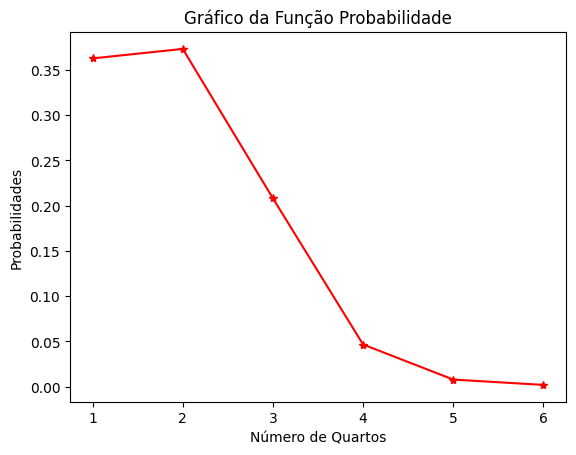

In [ ]:
plt.plot(fp_bedr, 'r*-')
plt.xlabel('Número de Quartos')
plt.ylabel('Probabilidades')
plt.title('Gráfico da Função Probabilidade')

##**2.7.1 - Função Repartição (Função Cumulativa)**

In [ ]:
funcao_cumulativa = fp.cumsum()
funcao_cumulativa

garage
0    0.353285
1    0.745900
2    0.909575
3    0.955603
4    0.983083
5    0.992701
6    1.000000
Name: count, dtype: float64

In [ ]:
funcao_cumulativa_bedr = fp_bedr.cumsum()
funcao_cumulativa_bedr

bedrooms
1    0.362645
2    0.735766
3    0.943753
4    0.990296
5    0.998111
6    1.000000
Name: count, dtype: float64

Text(0.5, 1.0, 'Gráfico da Função Cumulativa (Garagem)')

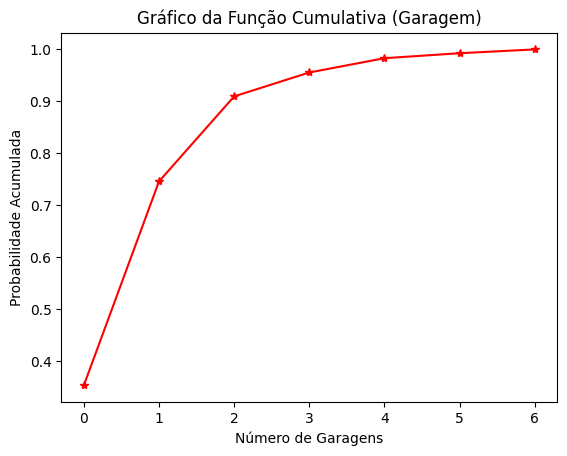

In [ ]:
plt.plot(funcao_cumulativa, 'r*-')
plt.xlabel('Número de Garagens')
plt.ylabel('Probabilidade Acumulada')
plt.title('Gráfico da Função Cumulativa (Garagem)')

Text(0.5, 1.0, 'Gráfico da Função Cumulativa (Quartos)')

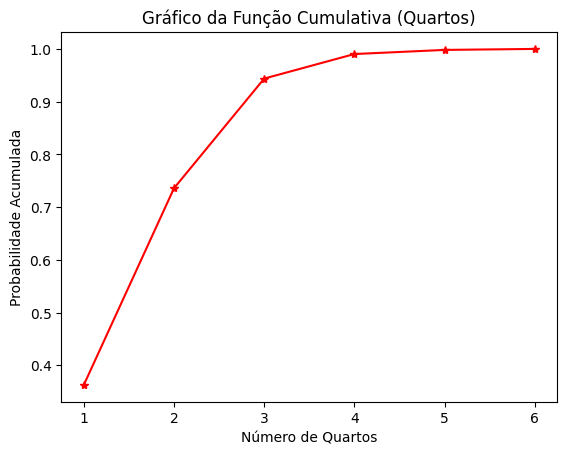

In [ ]:
plt.plot(funcao_cumulativa_bedr, 'r*-')
plt.xlabel('Número de Quartos')
plt.ylabel('Probabilidade Acumulada')
plt.title('Gráfico da Função Cumulativa (Quartos)')

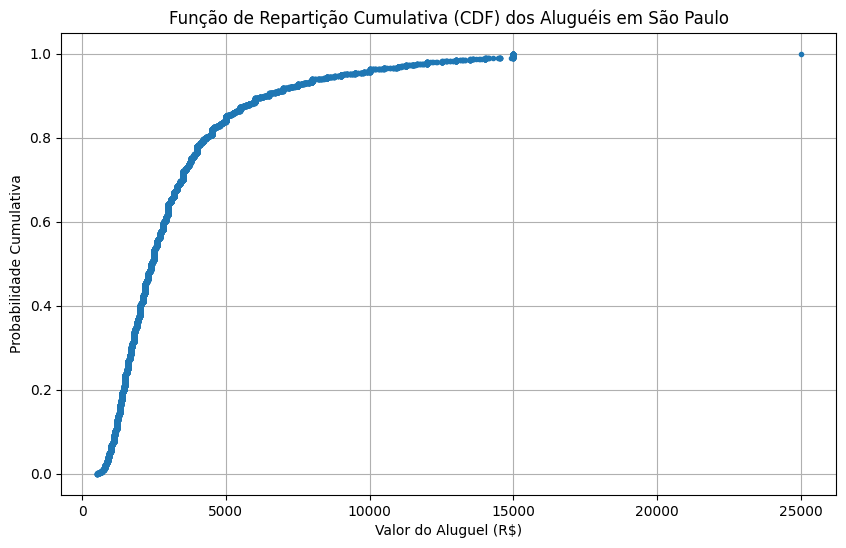

In [ ]:
alugueis = df_sp['rent']

# Calculando a CDF
sorted_alugueis = np.sort(alugueis)
cdf = np.arange(1, len(sorted_alugueis) + 1) / len(sorted_alugueis)

# Plotando a CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_alugueis, cdf, marker='.', linestyle='none')
plt.title('Função de Repartição Cumulativa (CDF) dos Aluguéis em São Paulo')
plt.xlabel('Valor do Aluguel (R$)')
plt.ylabel('Probabilidade Cumulativa')
plt.grid(True)
plt.show()

#**3.0 - Análise Estatística**

##**3.1 - Covariância**

In [ ]:
df_sp[['area',	'bedrooms',	'garage',	'rent',	'total']].cov()

,area,bedrooms,garage,rent,total
area,5476.604542,50.121341,61.486631,1.308123e+05,1.617778e+05
bedrooms,50.121341,0.856503,0.689824,1.309691e+03,1.639113e+03
garage,61.486631,0.689824,1.281285,1.850287e+03,2.343797e+03
rent,130812.323431,1309.691384,1850.287492,7.017132e+06,8.684057e+06
total,161777.816900,1639.112547,2343.796983,8.684057e+06,1.123271e+07


##**3.2 - Correlação**

In [ ]:
# Calculando a correlação entre as duas colunas
correlacao_sp = df_sp[['area',	'bedrooms',	'garage',	'rent',	'total']].corr()
correlacao_sp

,area,bedrooms,garage,rent,total
area,1.000000,0.731817,0.734010,0.667288,0.652260
bedrooms,0.731817,1.000000,0.658493,0.534226,0.528448
garage,0.734010,0.658493,1.000000,0.617073,0.617810
rent,0.667288,0.534226,0.617073,1.000000,0.978139
total,0.652260,0.528448,0.617810,0.978139,1.000000


Entre as colunas com a maior correlação está area com bedrooms. O que faz sentido considerando que quanto maior o número de quartos, maior será a área útil do imóvel.

In [ ]:
corr_area_bd = df_sp[['area', 'bedrooms']].corr()
corr_area_bd

,area,bedrooms
area,1.000000,0.731817
bedrooms,0.731817,1.000000


##**3.3 - Medidas de Centralidade**

###**Calculando a média dos aluguéis por bairro:**

In [ ]:
# Calcula a média dos aluguéis por bairro
media_aluguel_por_bairro = df_sp.groupby('district')['rent'].mean().reset_index()

# Renomeia as colunas para uma melhor compreensão
media_aluguel_por_bairro.columns = ['Bairro', 'Média de Aluguel']

# Exibe o resultado
print(media_aluguel_por_bairro)

                                                 Bairro  Média de Aluguel
0                                             Aclimação       2810.260000
1                                              Adalgisa       7275.500000
2                                           Agua Branca       2435.000000
3                                            Alphaville      11247.458333
4     Alphaville Centro Industrial E Empresarial/alp...       6300.000000
...                                                 ...               ...
1194                              Várzea da Barra Funda       3608.909091
1195                                        Água Branca       3774.045455
1196                                          Água Fria       3721.800000
1197                                         Água Funda       3000.000000
1198                                          Água Rasa       2845.894737

[1199 rows x 2 columns]


###**Calculando a mediana dos aluguéis por bairro:**

In [ ]:
# Calcula a mediana dos aluguéis por bairro
media_aluguel_por_bairro = df_sp.groupby('district')['rent'].median().reset_index()

# Renomeia as colunas para uma melhor compreensão
media_aluguel_por_bairro.columns = ['Bairro', 'Mediana de Aluguel']

print(media_aluguel_por_bairro)

                                                 Bairro  Mediana de Aluguel
0                                             Aclimação              2315.0
1                                              Adalgisa              7750.0
2                                           Agua Branca              2435.0
3                                            Alphaville             12500.0
4     Alphaville Centro Industrial E Empresarial/alp...              3500.0
...                                                 ...                 ...
1194                              Várzea da Barra Funda              2650.0
1195                                        Água Branca              2995.0
1196                                          Água Fria              2278.5
1197                                         Água Funda              3000.0
1198                                          Água Rasa              2000.0

[1199 rows x 2 columns]


##**3.4 - Distribuições Amostrais**

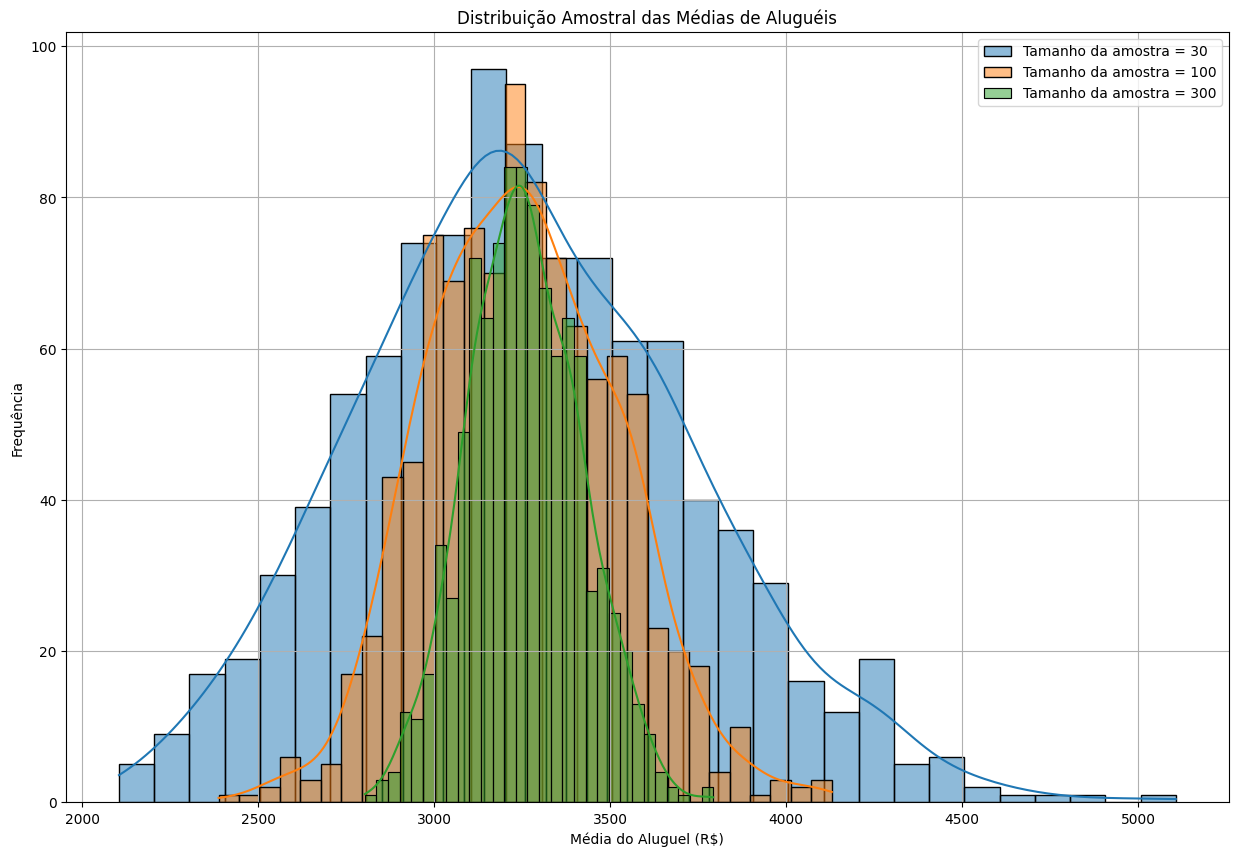

In [ ]:
# Criando uma variável para a coluna rent/Extração do valor dos aluguéis
alugueis = df_sp['rent']

# Função para criar a distribuição amostral das médias
def calc_sample_means(data, sample_size, num_samples):
    """cria amostras de um dado tamanho (sample_size) a partir dos dados
    originais e calcula a média de cada amostra. Isso é repetido num_samples
    vezes para gerar a distribuição das médias.
    Parâmetros:
    sample_sizes: tamanhos de amostra
    num_samples: número de amostras para cada tamanho de amostras
  """
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

# Parâmetros para a distribuição amostral
sample_sizes = [30, 100, 300]  # Diferentes tamanhos de amostra
num_samples = 1000  # Número de amostras para cada tamanho

# Plotando a distribuição amostral das médias
plt.figure(figsize=(15, 10))

for size in sample_sizes:
    sample_means = calc_sample_means(alugueis, sample_size=size, num_samples=num_samples)
    sns.histplot(sample_means, kde=True, label=f'Tamanho da amostra = {size}', bins=30)

plt.title('Distribuição Amostral das Médias de Aluguéis')
plt.xlabel('Média do Aluguel (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

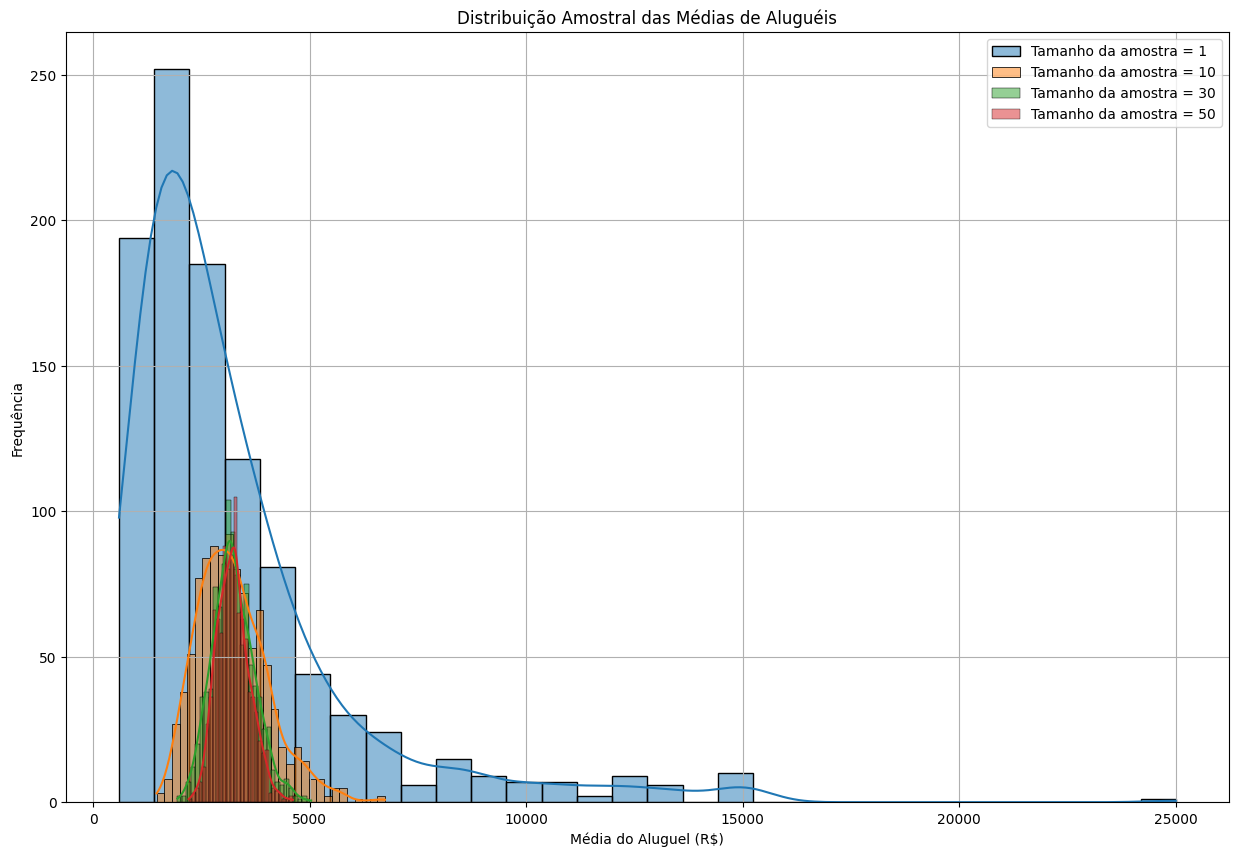

In [ ]:
# Criando uma variável para a coluna de aluguel/Extração do valor dos aluguéis
alugueis = df_sp['rent']

# Função para criar a distribuição amostral das médias
def calcular_medias_amostrais(dados, tamanho_amostra, numero_amostras):
    """Cria amostras de um dado tamanho (tamanho_amostra) a partir dos dados
    originais e calcula a média de cada amostra. Isso é repetido numero_amostras
    vezes para gerar a distribuição das médias.

    Parâmetros:
    dados: dados originais de onde as amostras serão tiradas
    tamanho_amostra: tamanho das amostras
    numero_amostras: número de amostras a serem tiradas
    """
    medias_amostrais = []  # Lista para armazenar as médias das amostras
    for _ in range(numero_amostras):
        amostra = np.random.choice(dados, size=tamanho_amostra, replace=True)  # Cria uma amostra aleatória com reposição
        medias_amostrais.append(np.mean(amostra))  # Calcula a média da amostra e adiciona à lista
    return medias_amostrais  # Retorna a lista de médias das amostras

# Parâmetros para a distribuição amostral
tamanhos_amostrais = [1, 10, 30, 50]  # Diferentes tamanhos de amostra
numero_amostras = 1000  # Número de amostras para cada tamanho

# Plotando a distribuição amostral das médias
plt.figure(figsize=(15, 10))  # Define o tamanho da figura

for tamanho in tamanhos_amostrais:
    medias_amostrais = calcular_medias_amostrais(alugueis, tamanho_amostra=tamanho, numero_amostras=numero_amostras)
    sns.histplot(medias_amostrais, kde=True, label=f'Tamanho da amostra = {tamanho}', bins=30)

plt.title('Distribuição Amostral das Médias de Aluguéis')
plt.xlabel('Média do Aluguel (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()


Este gráfico ajudará a visualizar como a média dos aluguéis varia com diferentes tamanhos de amostra. À medida que o tamanho da amostra aumenta, a distribuição das médias deve se tornar mais estreita e centrada em torno da verdadeira média da população, ilustrando o conceito de que amostras maiores tendem a fornecer estimativas mais precisas da média populacional.

Podemos usar este método para a análise de preços de aluguel em diferentes bairros e para fortalecer o argumento da criação do aplicativo de compartilhamento de imóveis.

##**3.5 - Intervalo de confiança**

In [ ]:

for _ in range(1000):
    amostra = np.random.choice(alugueis, size=50, replace=True)  # Cria uma amostra aleatória com reposição


# Média da amostra
media_amostra = np.mean(amostra)

# Desvio padrão da amostra
desvio_padrao_amostra = np.std(amostra, ddof=1)

# Tamanho da amostra
tamanho_amostra = len(amostra)

# Níveis de confiança
confiancas = [0.90, 0.95, 0.99]

# Cálculo dos Intervalos de Confiança
for confianca in confiancas:
    z = stats.norm.ppf(1 - (1 - confianca) / 2)
    margem_erro = z * (desvio_padrao_amostra / np.sqrt(tamanho_amostra))
    IC_inferior = media_amostra - margem_erro
    IC_superior = media_amostra + margem_erro
    print(f"Intervalo de Confiança de {confianca*100}%: [{IC_inferior:.2f}, {IC_superior:.2f}]")

Intervalo de Confiança de 90.0%: [2501.43, 3655.49]
Intervalo de Confiança de 95.0%: [2390.89, 3766.03]
Intervalo de Confiança de 99.0%: [2174.84, 3982.08]


#**4.0 - Estatística Descritiva**

###**4.0.1 - Gráfico com os Bairros com Aluguéis Mais Baixos**

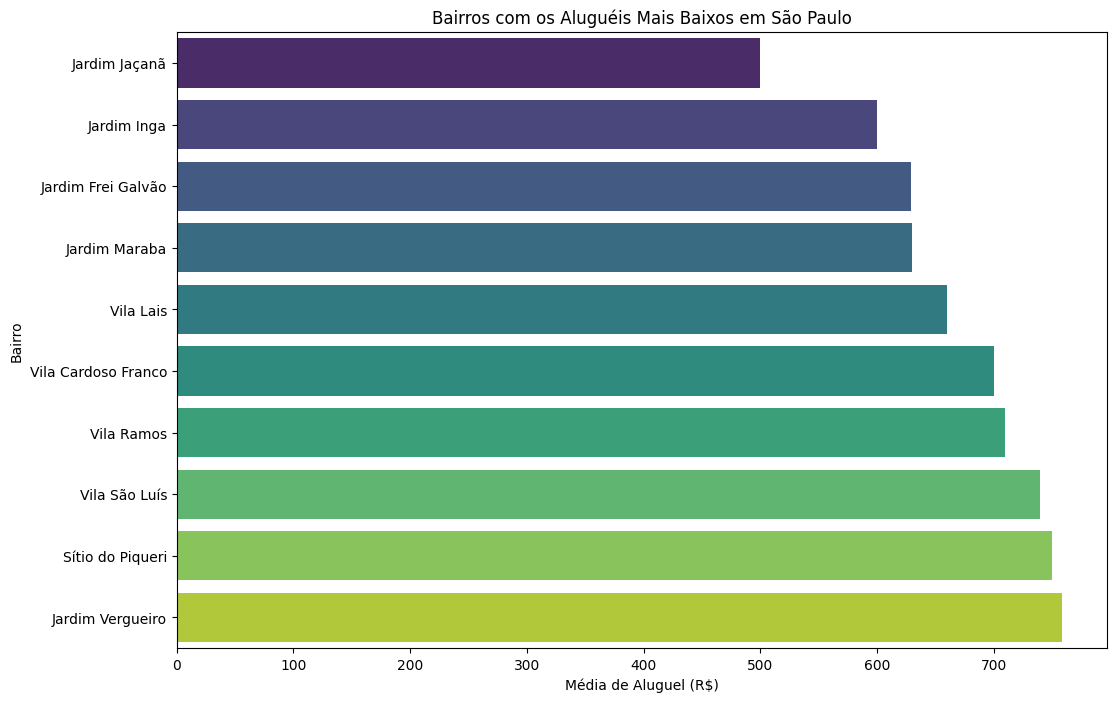

In [ ]:
# Calcula a média dos aluguéis por bairro
media_aluguel_por_bairro = df_sp.groupby('district')['rent'].mean().reset_index()

# Renomeia as colunas para uma melhor compreensão
media_aluguel_por_bairro.columns = ['Bairro', 'Média de Aluguel']

# Ordena os bairros pela média de aluguel para um gráfico mais organizado
media_aluguel_por_bairro = media_aluguel_por_bairro.sort_values(by='Média de Aluguel', ascending=True)

# Seleciona os bairros com os aluguéis mais baixos (por exemplo, os 10 mais baixos)
bairros_mais_baratos = media_aluguel_por_bairro.head(10)

# Configura o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras
sns.barplot(x='Média de Aluguel', y='Bairro', data=bairros_mais_baratos, palette='viridis', hue='Bairro', legend=False)

# Adiciona título e rótulos aos eixos
plt.title('Bairros com os Aluguéis Mais Baixos em São Paulo')
plt.xlabel('Média de Aluguel (R$)')
plt.ylabel('Bairro')

# Exibe o gráfico
plt.show()

###**4.0.2 - Gráfico com os Bairros Mais Procurados de 2023**

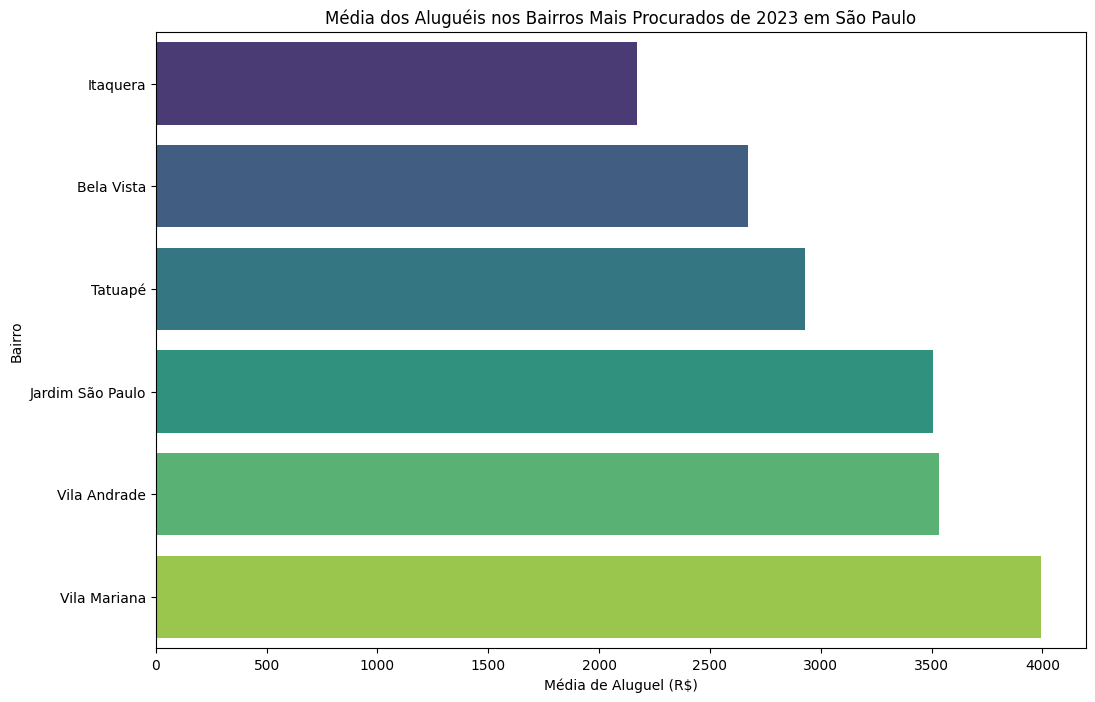

In [ ]:
# Lista dos bairros mais procurados de 2023
bairros_procurados_2023 = ['Vila Mariana', 'Itaquera', 'Jardim São Paulo', 'Vila Andrade', 'Bela Vista', 'Tatuapé']

# Filtra o DataFrame para incluir apenas os bairros procurados
media_aluguel_procurados = media_aluguel_por_bairro[media_aluguel_por_bairro['Bairro'].isin(bairros_procurados_2023)]

# Ordena os bairros procurados pela média de aluguel
media_aluguel_procurados = media_aluguel_procurados.sort_values(by='Média de Aluguel', ascending=True)

# Configura o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras
sns.barplot(x='Média de Aluguel', y='Bairro', data=media_aluguel_procurados, palette='viridis', hue='Bairro', legend=False)

# Adiciona título e rótulos aos eixos
plt.title('Média dos Aluguéis nos Bairros Mais Procurados de 2023 em São Paulo')
plt.xlabel('Média de Aluguel (R$)')
plt.ylabel('Bairro')

# Exibe o gráfico
plt.show()

##**4.1 - Gráficos de Dispersão**

A correlação entre as colunas é: 0.6672877568055092


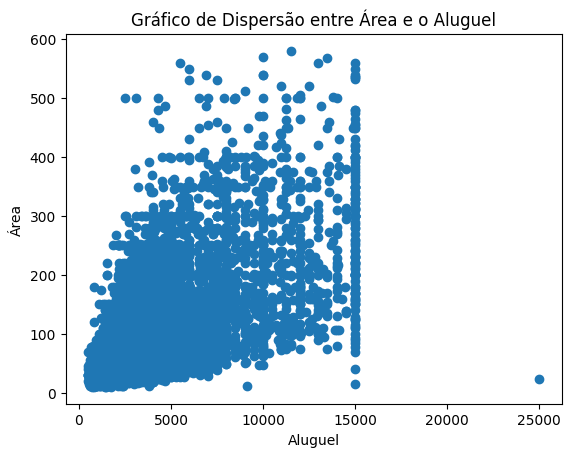

In [ ]:
# Calculando a correlação entre as duas colunas
correlacao_area_rent = df_sp['area'].corr(df_sp['rent'])

# Imprimindo o valor da correlação
print(f'A correlação entre as colunas é: {correlacao_area_rent}')

# Plotando o gráfico de dispersão para visualizar a correlação
plt.scatter(df_sp['rent'], df_sp['area'])
plt.title('Gráfico de Dispersão entre Área e o Aluguel')
plt.xlabel('Aluguel')
plt.ylabel('Área')
plt.show()


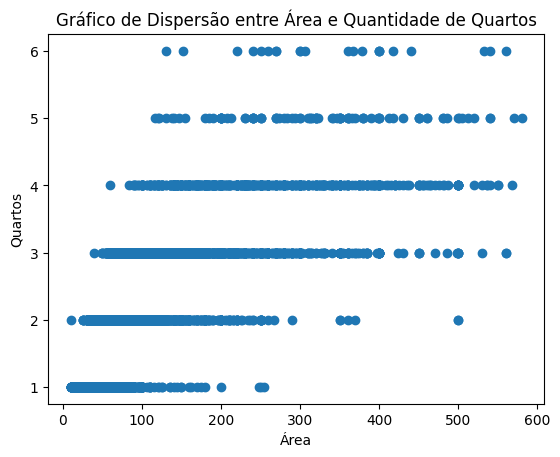

In [ ]:
# Plotando o gráfico de dispersão para visualizar a correlação
plt.scatter(df_sp['area'], df_sp['bedrooms'])
plt.title('Gráfico de Dispersão entre Área e Quantidade de Quartos')
plt.xlabel('Área')
plt.ylabel('Quartos')
plt.show()


##**4.2 - Gráficos de Distribuição**

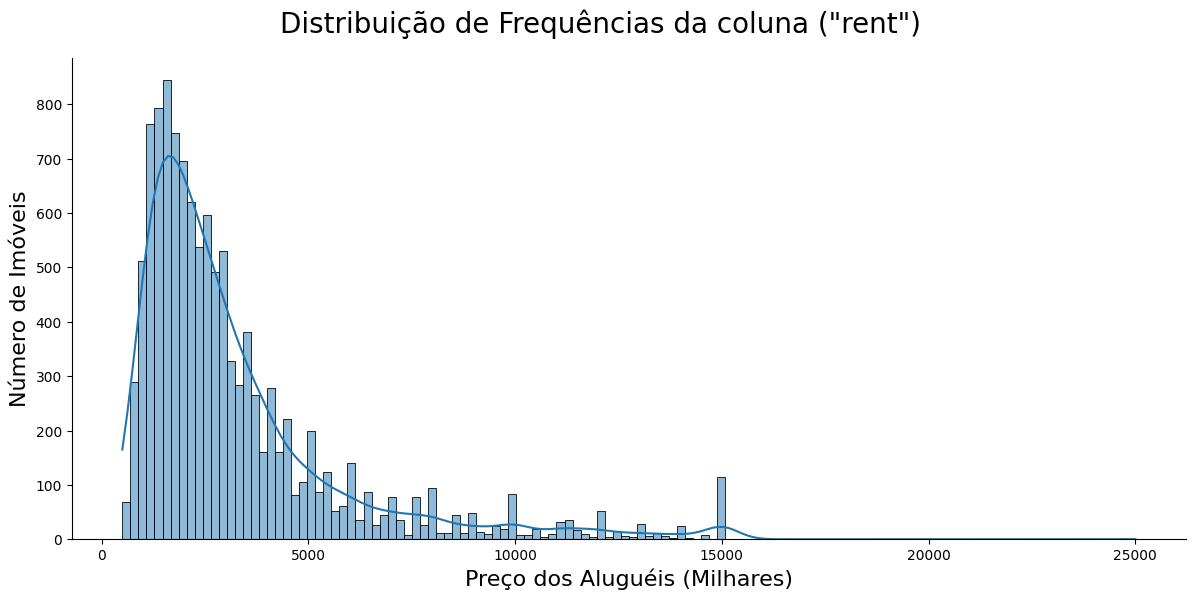

In [ ]:
# Gráfico de distribuição
ax = sns.displot(df_sp['rent'], kde=True, height=6, aspect=2)  # Ajustar a altura e a proporção

# Configurando os labels e o título
ax.fig.suptitle('Distribuição de Frequências da coluna ("rent")', fontsize=20)  # Título
ax.set_axis_labels('Preço dos Aluguéis (Milhares)', 'Número de Imóveis', fontsize=16)  # Labels dos eixos

# Ajustar a posição do título
plt.subplots_adjust(top=0.9)

plt.show()

Essa distribuição é comum em variáveis que não podem assumir valores negativos e onde há um limite inferior (como o preço do aluguel), mas não há um limite superior bem definido, permitindo a existência de alguns valores extremos elevados.

No contexto de análise de aluguéis em São Paulo, isso sugere que a maioria dos imóveis tem aluguéis mais acessíveis, mas há uma variedade de aluguéis mais caros que ocorrem com menos frequência. Isso pode ser um ponto interessante para destacar na sua apresentação, pois reforça a necessidade de soluções como o app proposto para ajudar a encontrar aluguéis mais acessíveis em bairros desejados.







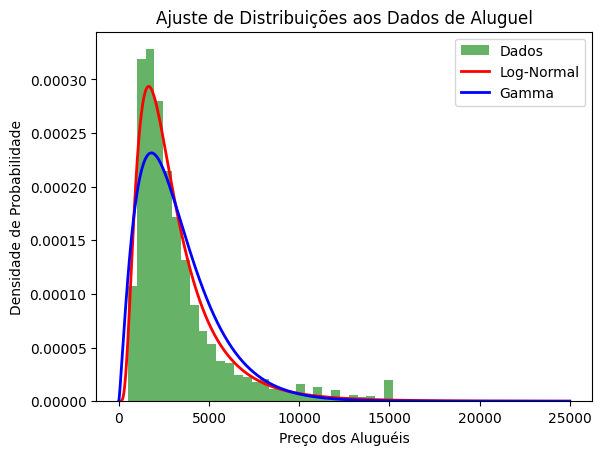

In [ ]:
# Criando uma variável para a coluna "rent"
rent_data = df_sp['rent'].values

# Ajusta as distribuições log-normal e gamma
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(rent_data, floc=0)
shape_g, loc_g, scale_g = stats.gamma.fit(rent_data, floc=0)

# Cria um intervalo de valores para plotar as distribuições ajustadas
x = np.linspace(0, rent_data.max(), 1000)

# PDF das distribuições ajustadas
pdf_ln = stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln)
pdf_g = stats.gamma.pdf(x, shape_g, loc_g, scale_g)

# Plotando o histograma dos dados e as distribuições ajustadas
plt.hist(rent_data, bins=50, density=True, alpha=0.6, color='g', label='Dados')
plt.plot(x, pdf_ln, 'r-', lw=2, label='Log-Normal')
plt.plot(x, pdf_g, 'b-', lw=2, label='Gamma')
plt.legend(loc='best')
plt.xlabel('Preço dos Aluguéis')
plt.ylabel('Densidade de Probabilidade')
plt.title('Ajuste de Distribuições aos Dados de Aluguel')
plt.show()

A coluna "rent", ou seja, os dados dos aluguéis possuem uma distribuição do tipo Log-normal.

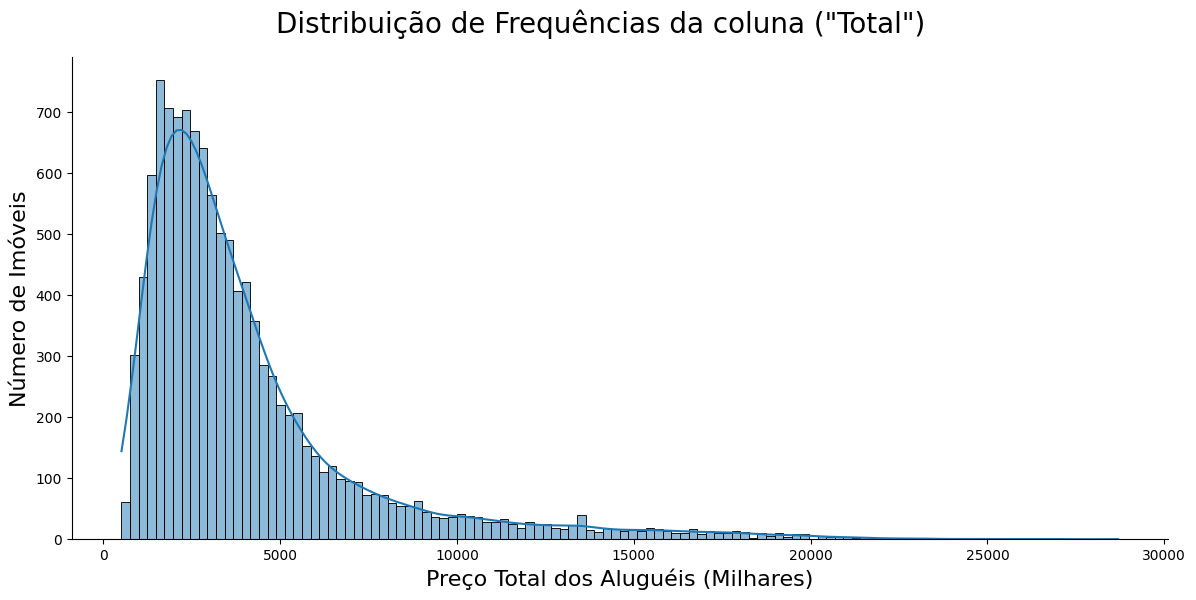

In [ ]:
# Gráfico de distribuição
ax = sns.displot(df_sp['total'], kde=True, height=6, aspect=2)  # Ajustar a altura e a proporção

# Configurando os labels e o título
ax.fig.suptitle('Distribuição de Frequências da coluna ("Total")', fontsize=20)  # Título
ax.set_axis_labels('Preço Total dos Aluguéis (Milhares)', 'Número de Imóveis', fontsize=16)  # Labels dos eixos

# Ajustar a posição do título
plt.subplots_adjust(top=0.9)

plt.show()

**O contexto é o mesmo para o gráfico de "rent".**

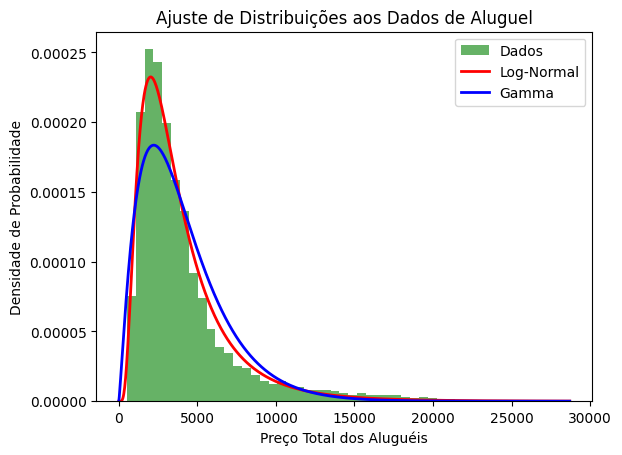

In [ ]:
# Criando uma variável para a coluna "total"
total_data = df_sp['total'].values

# Ajusta as distribuições log-normal e gamma
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(total_data, floc=0)
shape_g, loc_g, scale_g = stats.gamma.fit(total_data, floc=0)

# Cria um intervalo de valores para plotar as distribuições ajustadas
x = np.linspace(0, total_data.max(), 1000)

# PDF das distribuições ajustadas
pdf_ln = stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln)
pdf_g = stats.gamma.pdf(x, shape_g, loc_g, scale_g)

# Plotando o histograma dos dados e as distribuições ajustadas
plt.hist(total_data, bins=50, density=True, alpha=0.6, color='g', label='Dados')
plt.plot(x, pdf_ln, 'r-', lw=2, label='Log-Normal')
plt.plot(x, pdf_g, 'b-', lw=2, label='Gamma')
plt.legend(loc='best')
plt.xlabel('Preço Total dos Aluguéis')
plt.ylabel('Densidade de Probabilidade')
plt.title('Ajuste de Distribuições aos Dados de Aluguel')
plt.show()

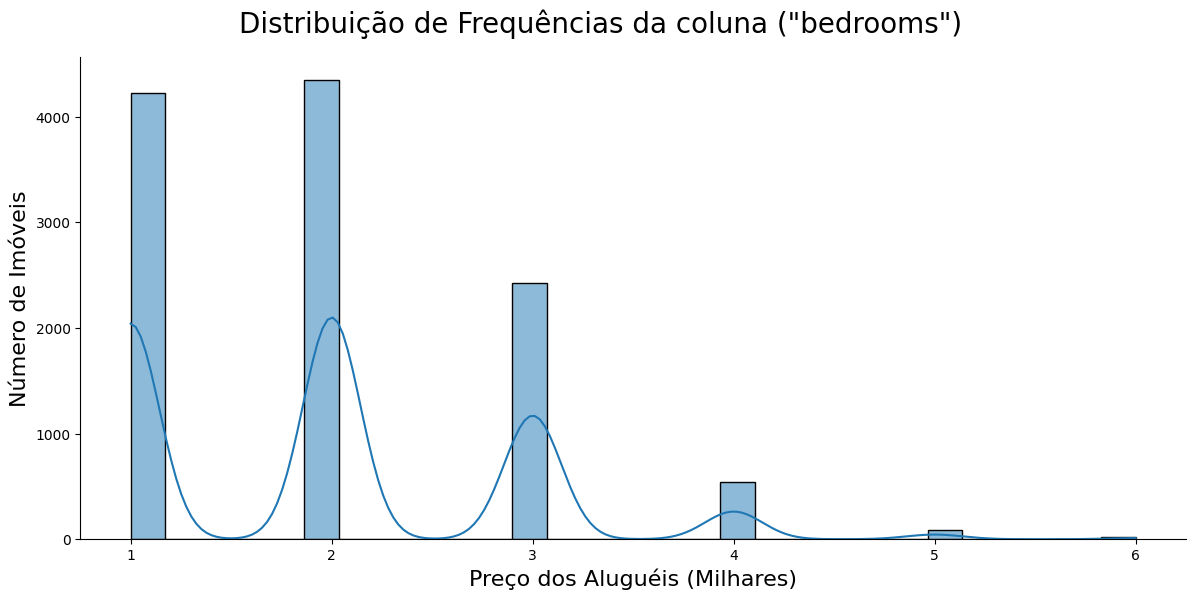

In [ ]:
# Gráfico de distribuição
ax = sns.displot(df_sp['bedrooms'], kde=True, height=6, aspect=2)  # Ajustar a altura e a proporção

# Configurando os labels e o título
ax.fig.suptitle('Distribuição de Frequências da coluna ("bedrooms")', fontsize=20)  # Título
ax.set_axis_labels('Preço dos Aluguéis (Milhares)', 'Número de Imóveis', fontsize=16)  # Labels dos eixos

# Ajustar a posição do título
plt.subplots_adjust(top=0.9)

plt.show()

A distribuição mostrada no gráfico de frequência do número de quartos ("bedrooms") parece ser uma distribuição discreta, pois o número de quartos é uma variável categórica que assume valores inteiros específicos (1, 2, 3, 4, 5, 6).

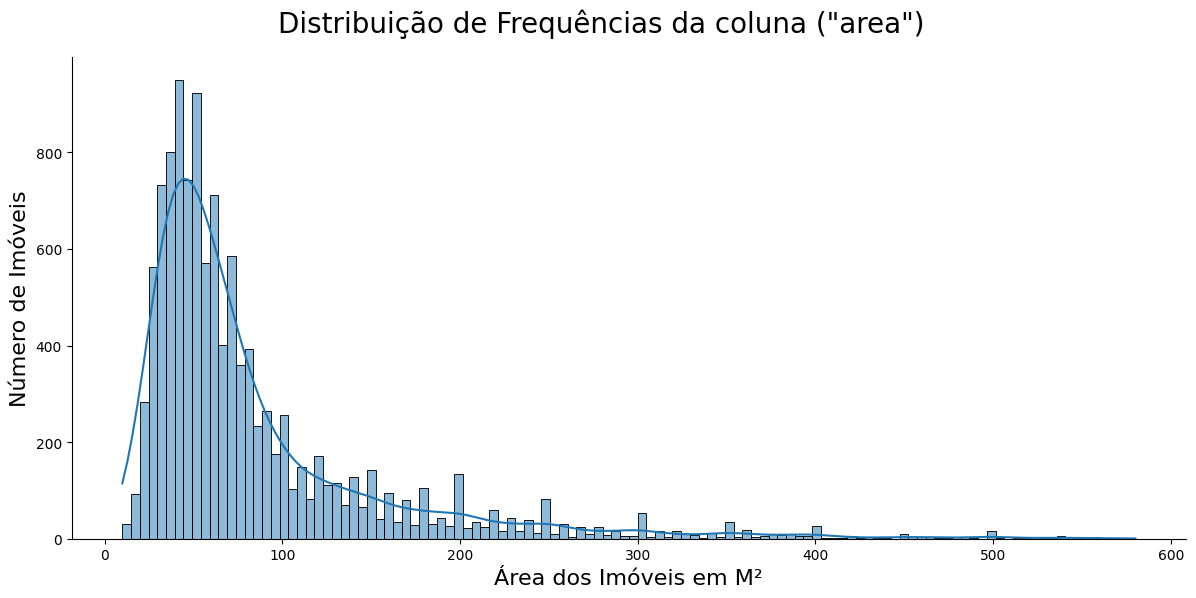

In [ ]:
# Gráfico de distribuição
ax = sns.displot(df_sp['area'], kde=True, height=6, aspect=2)  # Ajustar a altura e a proporção

# Configurando os labels e o título
ax.fig.suptitle('Distribuição de Frequências da coluna ("area")', fontsize=20)  # Título
ax.set_axis_labels('Área dos Imóveis em M²', 'Número de Imóveis', fontsize=16)  # Labels dos eixos

# Ajustar a posição do título
plt.subplots_adjust(top=0.9)

plt.show()

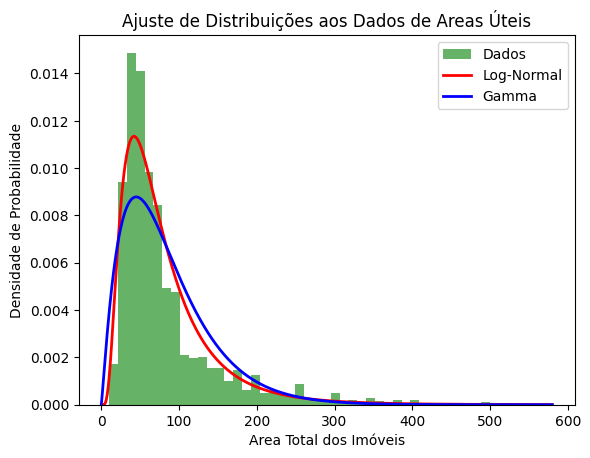

In [ ]:
# Criando uma variável para a coluna "total"
area_data = df_sp['area'].values

# Ajusta as distribuições log-normal e gamma
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(area_data, floc=0)
shape_g, loc_g, scale_g = stats.gamma.fit(area_data, floc=0)

# Cria um intervalo de valores para plotar as distribuições ajustadas
x = np.linspace(0, area_data.max(), 1000)

# PDF das distribuições ajustadas
pdf_ln = stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln)
pdf_g = stats.gamma.pdf(x, shape_g, loc_g, scale_g)

# Plotando o histograma dos dados e as distribuições ajustadas
plt.hist(area_data, bins=50, density=True, alpha=0.6, color='g', label='Dados')
plt.plot(x, pdf_ln, 'r-', lw=2, label='Log-Normal')
plt.plot(x, pdf_g, 'b-', lw=2, label='Gamma')
plt.legend(loc='best')
plt.xlabel('Area Total dos Imóveis')
plt.ylabel('Densidade de Probabilidade')
plt.title('Ajuste de Distribuições aos Dados de Areas Úteis')
plt.show()

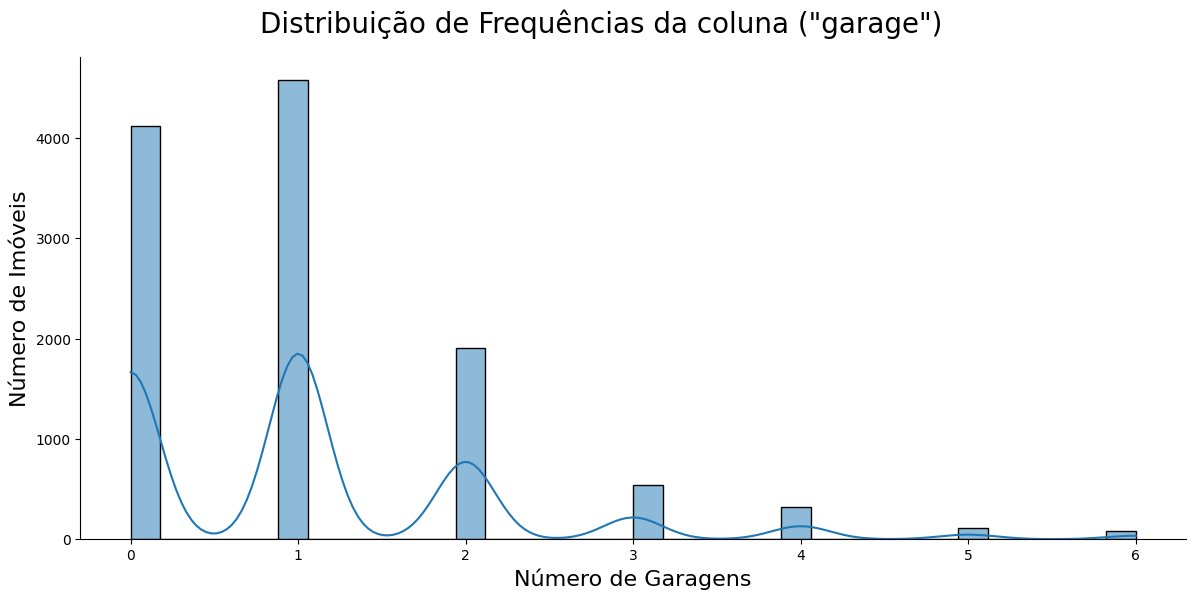

In [ ]:
# Gráfico de distribuição
ax = sns.displot(df_sp['garage'], kde=True, height=6, aspect=2)  # Ajustar a altura e a proporção

# Configurando os labels e o título
ax.fig.suptitle('Distribuição de Frequências da coluna ("garage")', fontsize=20)  # Título
ax.set_axis_labels('Número de Garagens', 'Número de Imóveis', fontsize=16)  # Labels dos eixos

# Ajustar a posição do título
plt.subplots_adjust(top=0.9)

plt.show()

##**4.2.1 - Comparando as Distribuições**

**Coluna Bedrooms**

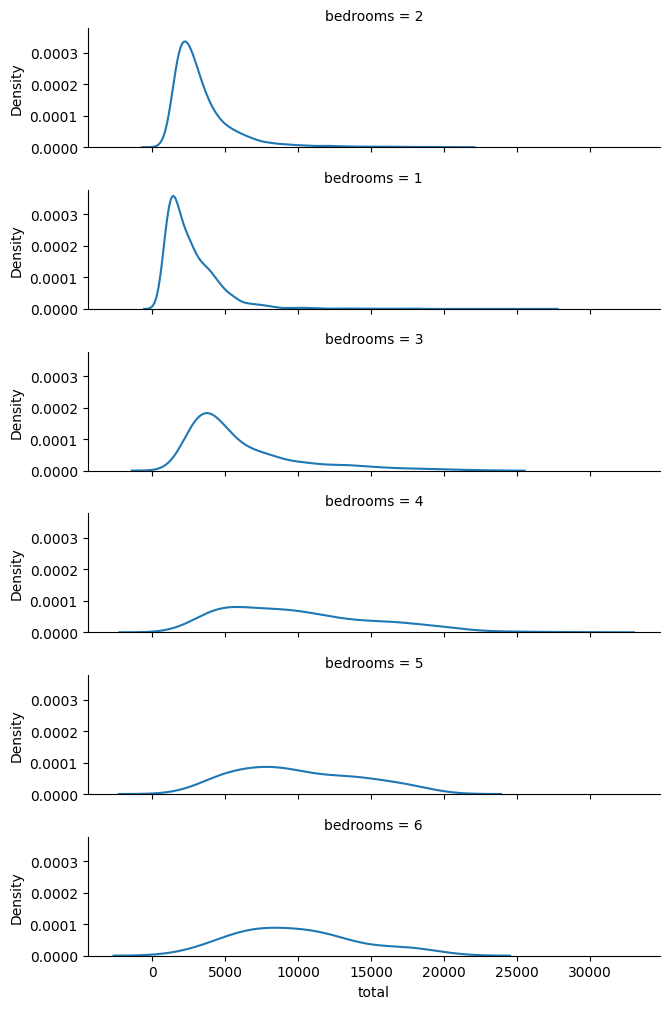

In [ ]:
ordered_bedrooms = df_sp.bedrooms.value_counts().index
g = sns.FacetGrid(df_sp, row='bedrooms', row_order=ordered_bedrooms,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, 'total')

A maioria dos imóveis possuem dois quartos.

**Coluna Garage**

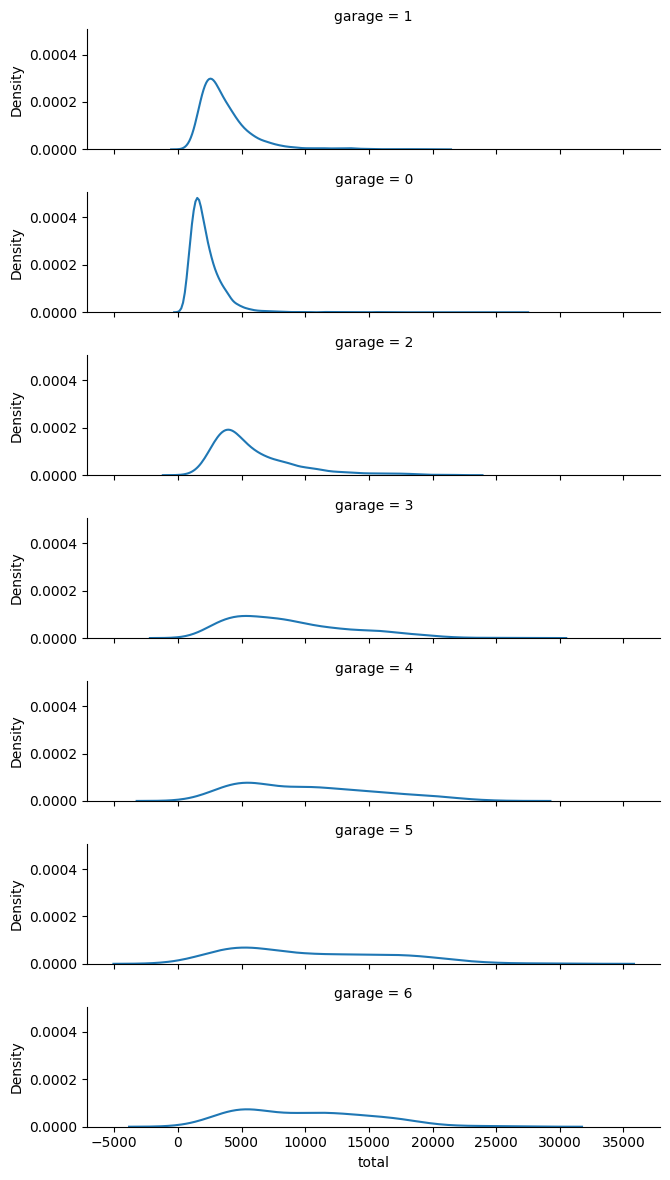

In [ ]:
ordered_garage = df_sp.garage.value_counts().index
g = sns.FacetGrid(df_sp, row='garage', row_order=ordered_garage,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, 'total')

A maioria dos imóveis possuem uma ou nenhuma garagem.

##**4.3 - Gráficos Boxplot**

Comparando os bairros mais requisitados

In [ ]:
df_vilaMariana = df_sp[df_sp['district'] == 'Vila Mariana']
df_itaim = df_sp[df_sp['district'] == 'Itaim']
df_tatuapé = df_sp[df_sp['district'] == 'Tatuapé']
df_vilaAndrade = df_sp[df_sp['district'] == 'Vila Andrade']
df_belaVista = df_sp[df_sp['district'] == 'Bela Vista']
df_itaquera = df_sp[df_sp['district'] == 'Itaquera']

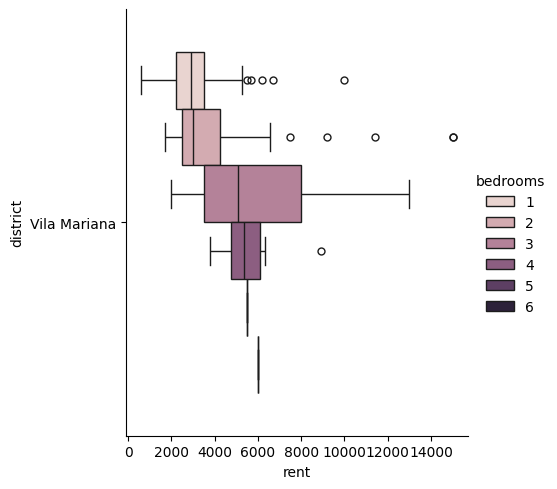

In [ ]:
sns.catplot(data=df_vilaMariana, x='rent', y='district', hue= 'bedrooms', kind='box')

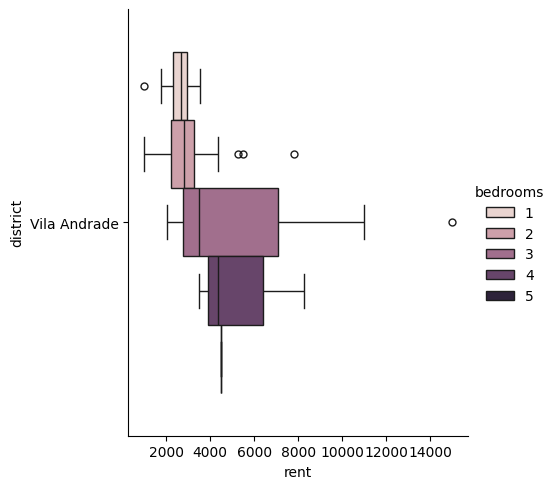

In [ ]:
sns.catplot(data=df_vilaAndrade, x='rent', y='district', hue= 'bedrooms', kind='box')

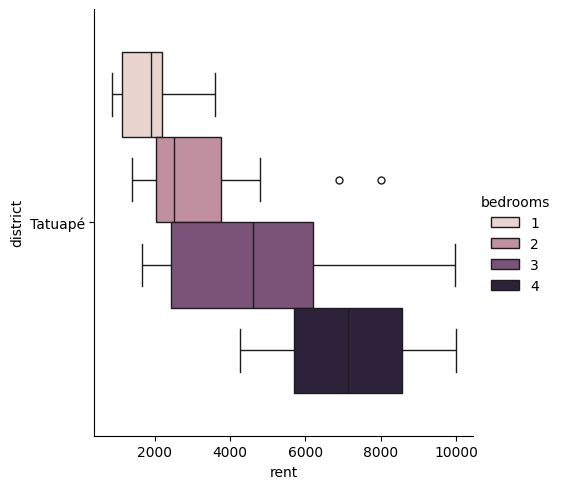

In [ ]:
sns.catplot(data=df_tatuapé, x='rent', y='district', hue= 'bedrooms', kind='box')

Analisando os aluguéis do bairro Itaquera, um dos bairros mais baratos da capital.

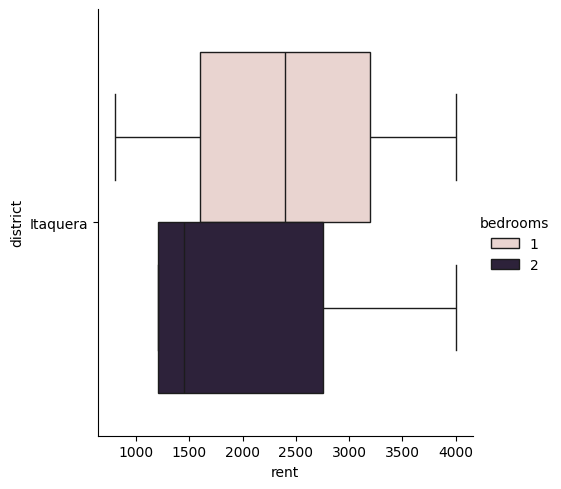

In [ ]:
sns.catplot(data=df_itaquera, x='rent', y='district', hue= 'bedrooms', kind='box')

Podemos observar que o bairro Itaquera possui apenas duas opções de quartos 1 ou 2 para aluguel na plataforma QuartoAndar. A mediana dos aluguéis

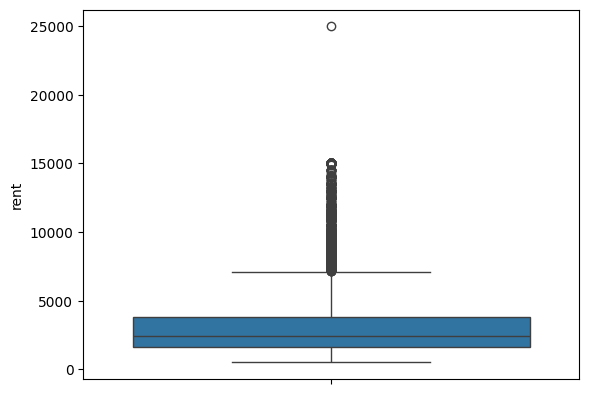

In [ ]:
# Criando o gráfico de boxplot com seaborn
sns.boxplot(data=df_sp['rent'])

# Exibindo o gráfico
plt.show()


##**4.4 - Estimando tendência central entre quartos e valor de aluguel:**

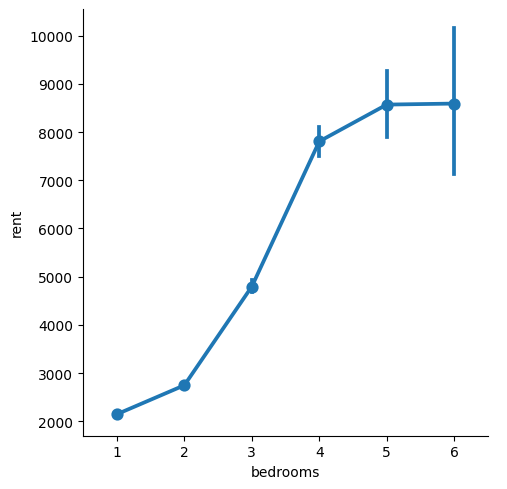

In [ ]:
sns.catplot(data=df_sp, x='bedrooms', y='rent', kind='point')

À medida que o número de quartos cresce os valores de aluguel ficam mais altos. Uma tendência esperada e lógica.

##**4.5 - Relação entre duas colunas**

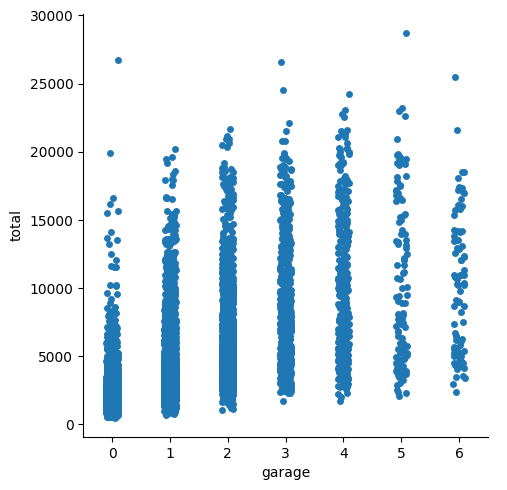

In [ ]:
# Analisando garage x rent
sns.catplot(data=df_sp, x="garage", y='total')

Podemos verificar que existe uma maior quantidade de imóveis com 1 e 2 garagens.  

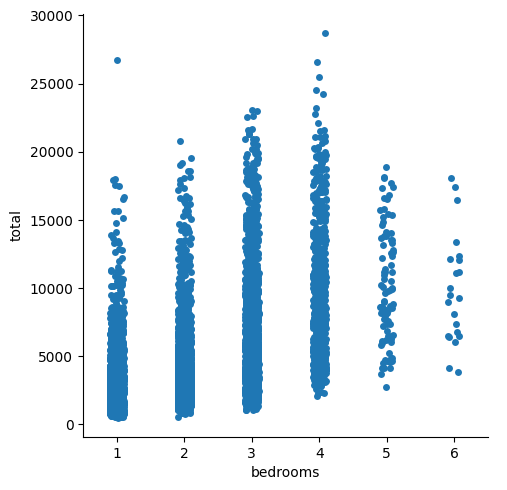

In [ ]:
# Analisando garage x rent
sns.catplot(data=df_sp, x="bedrooms", y="total")

##**4.6 - Gráficos Heatmap**

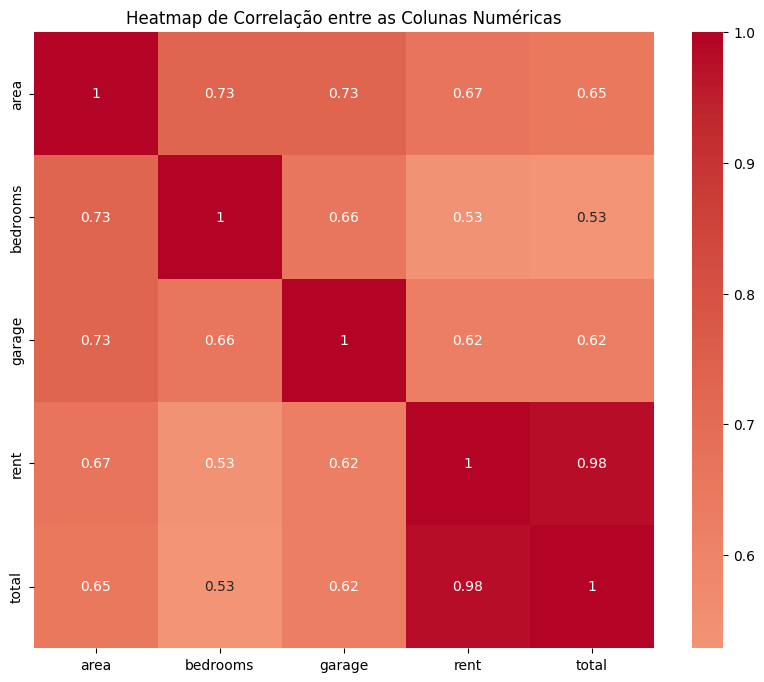

In [ ]:
# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_sp, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre as Colunas Numéricas')
plt.show()

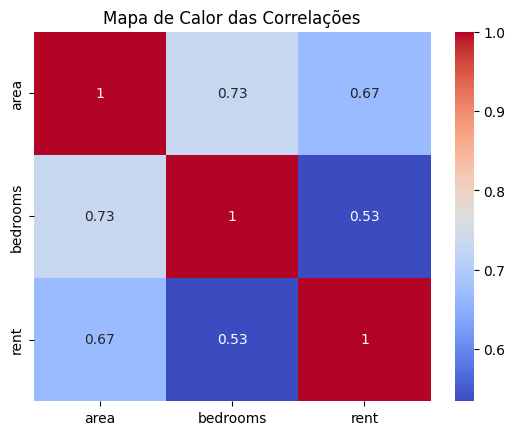

In [ ]:
corr = df_sp[['area',	'bedrooms','rent']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

##**4.7 - Traçando relacionamentos de dados entre pares**

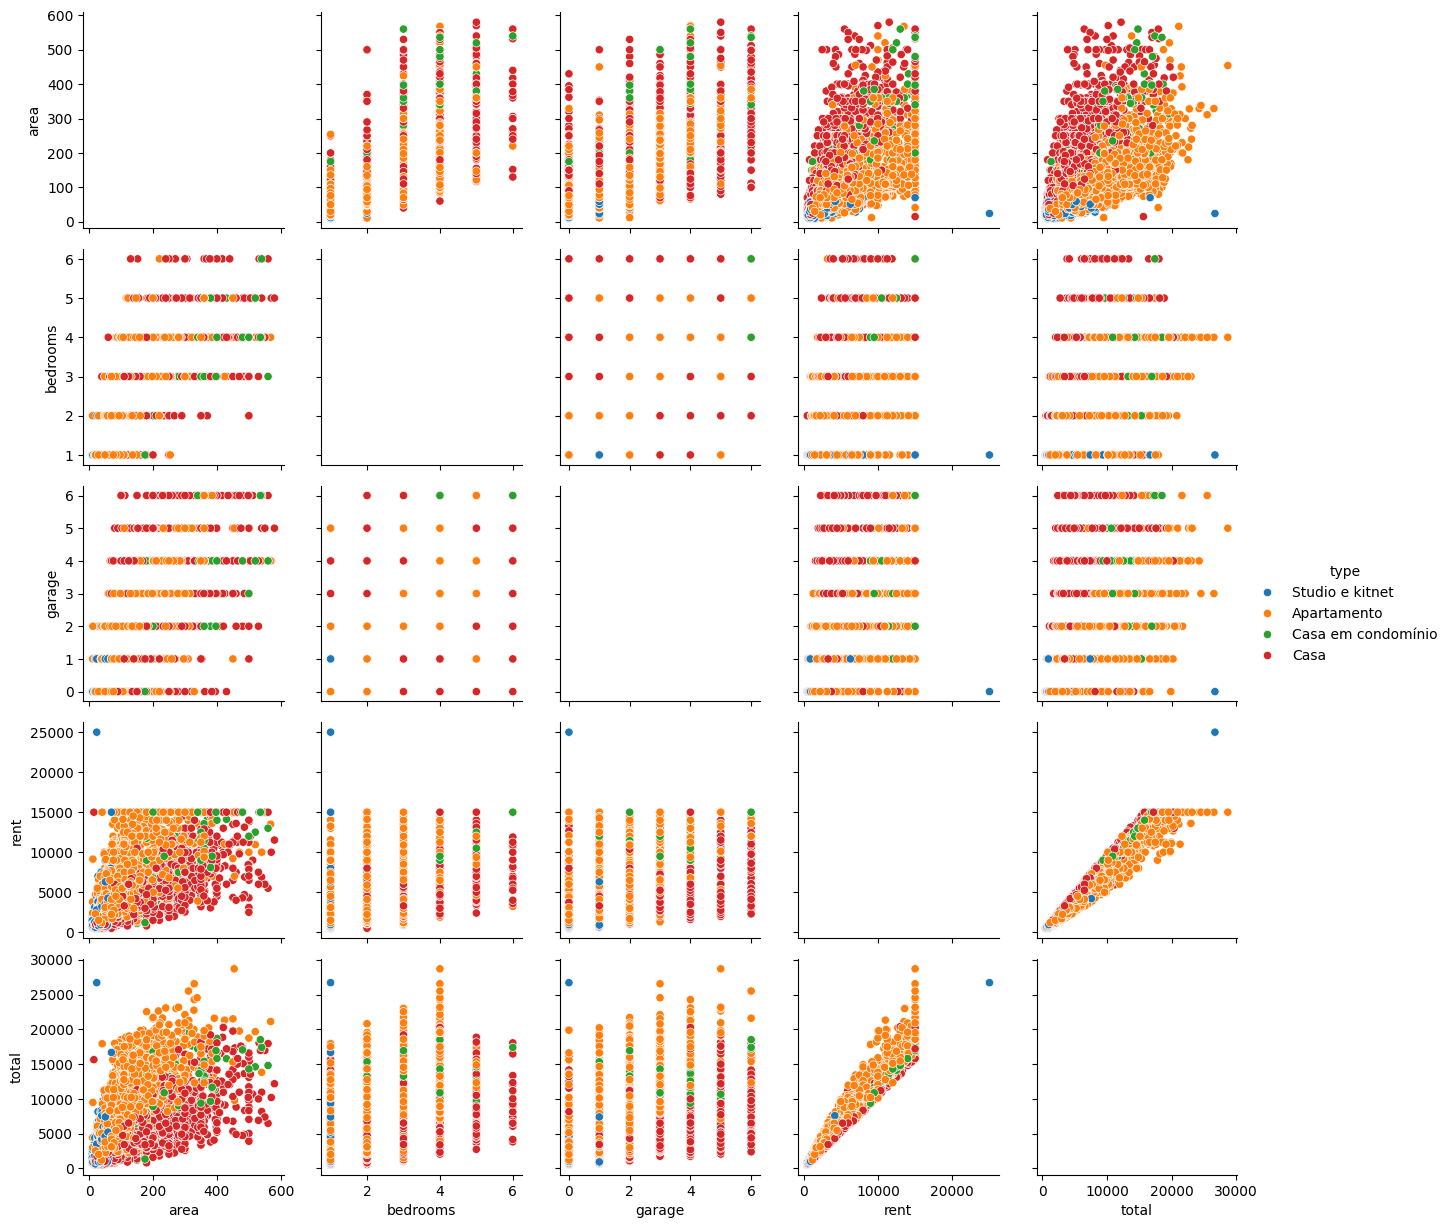

In [ ]:
# Selecionar as colunas específicas e a coluna hue
columns_to_plot = ['area', 'bedrooms', 'garage', 'rent', 'total', 'type']
df_selected = df_sp[columns_to_plot]

# Criar o PairGrid com as colunas selecionadas e hue
x = sns.PairGrid(df_selected, hue='type')

# Mapear os gráficos offdiag
x.map_offdiag(sns.scatterplot)

# Adicionar a legenda
x.add_legend()

plt.show()

Ao analisarmos diversos gráficos, verificamos um outlier. Verificamos que é um imóvel do tipo "studio e kitnet" com 24m², sem garagem e em um bairro sem aluguéis muito altos. O que significa que é provavelmente um erro na coleta dos dados, por isso decidimos excluí-lo.

In [ ]:
out = df_sp[df_sp['rent']>20000]
out

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24,1,0,Studio e kitnet,25000,26710


#**5.0 - Bibliografias**

#Projeto Visualização de dados

##Gráfico 01 - Distribuição das frequências das áreas

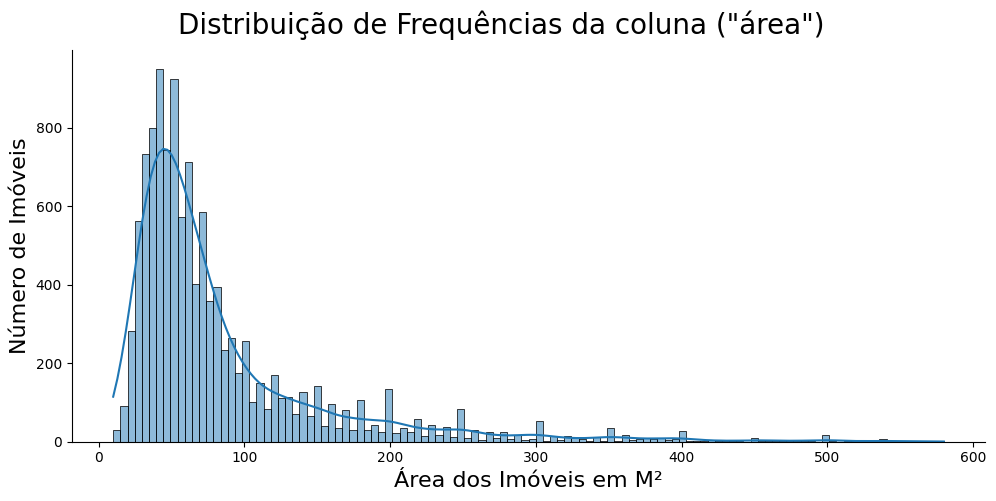

In [ ]:
# Gráfico de distribuição
ax = sns.displot(df_sp['area'], kde=True, height=5, aspect=2)  # Ajustar a altura e a proporção

# Configurando os labels e o título
ax.fig.suptitle('Distribuição de Frequências da coluna ("área")', fontsize=20)  # Título
ax.set_axis_labels('Área dos Imóveis em M²', 'Número de Imóveis', fontsize=16)  # Labels dos eixos

# Ajustar a posição do título
plt.subplots_adjust(top=0.9)

plt.show()

## Gráfico 02 - Distribuição das frequências das áreas

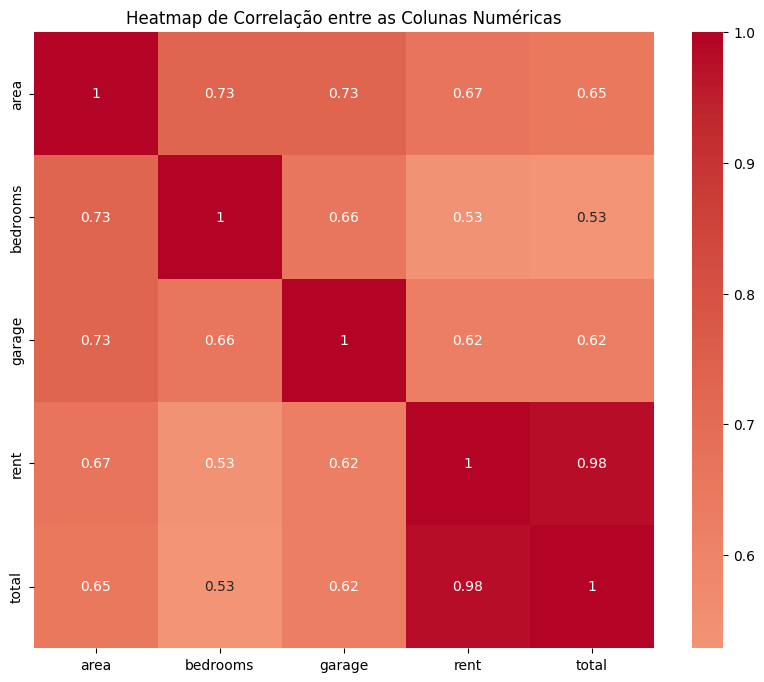

In [ ]:
# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_sp, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação entre as Colunas Numéricas')
plt.show()

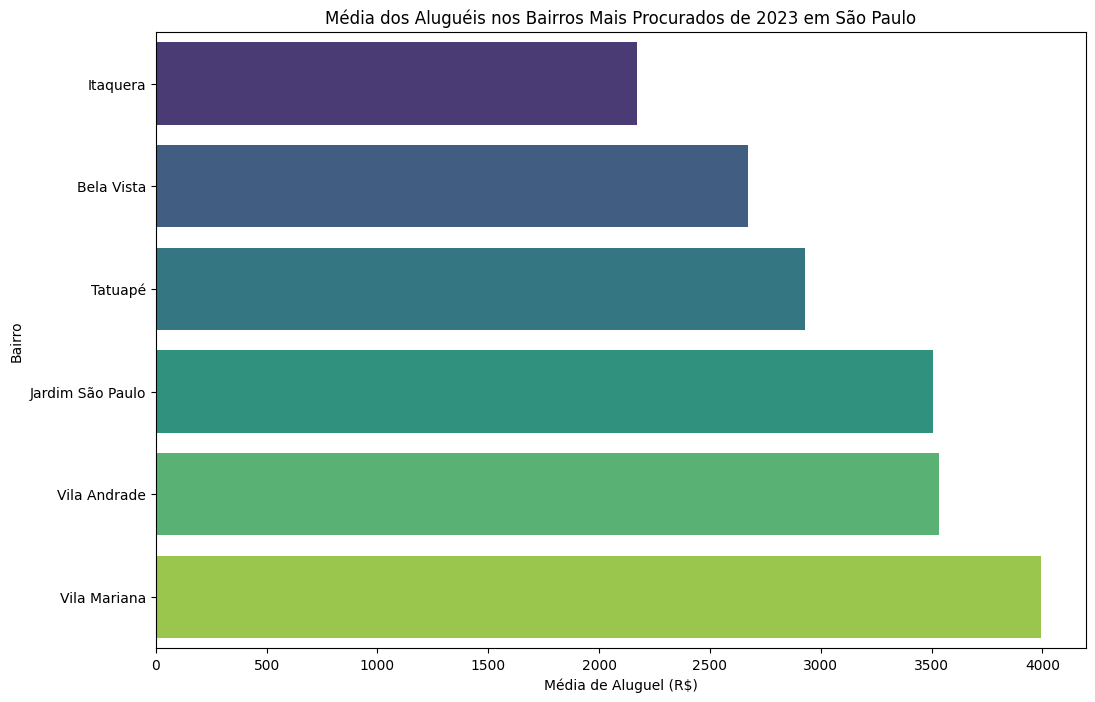

In [ ]:
# Lista dos bairros mais procurados de 2023
bairros_procurados_2023 = ['Vila Mariana', 'Itaquera', 'Jardim São Paulo', 'Vila Andrade', 'Bela Vista', 'Tatuapé']

# Filtra o DataFrame para incluir apenas os bairros procurados
media_aluguel_procurados = media_aluguel_por_bairro[media_aluguel_por_bairro['Bairro'].isin(bairros_procurados_2023)]

# Ordena os bairros procurados pela média de aluguel
media_aluguel_procurados = media_aluguel_procurados.sort_values(by='Média de Aluguel', ascending=True)

# Configura o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras
sns.barplot(x='Média de Aluguel', y='Bairro', data=media_aluguel_procurados, palette='viridis', hue='Bairro', legend=False)

# Adiciona título e rótulos aos eixos
plt.title('Média dos Aluguéis nos Bairros Mais Procurados de 2023 em São Paulo')
plt.xlabel('Média de Aluguel (R$)')
plt.ylabel('Bairro')

# Exibe o gráfico
plt.show()

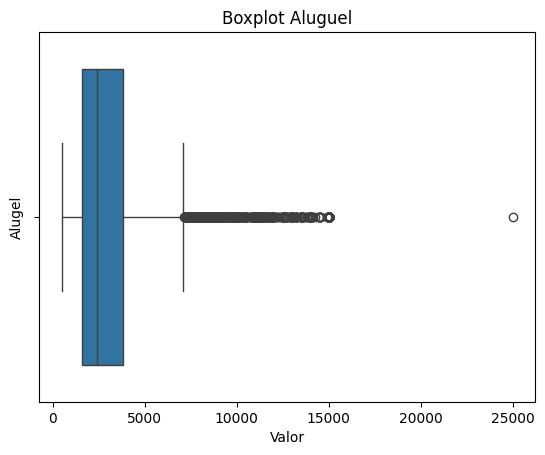

In [ ]:
# Criando o gráfico de boxplot com seaborn
sns.boxplot(data=df_sp['rent'], orient='h')

plt.xlabel('Valor')
plt.ylabel('Alugel')
plt.title('Boxplot Aluguel')

# Exibindo o gráfico
plt.show()